<a href="https://colab.research.google.com/github/mnikolop/PythonTutorial/blob/master/KarolinskaTutorial-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python 

Python is an interpreted, high-level, general-purpose programming language.    
Can be used for almost anything.   
We are using it for data analysis.    
Main library used in data analysis is pandas.   
There used to be 2 version python2 (or python) and python 3. Since January 1st Python 2 has been depricated so we are only using python 3.

## Main Resource
- [python](https://www.python.org/)
- [stackoverflow](https://stackoverflow.com/)
- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [toward data science](https://towardsdatascience.com/)

## Editors

Editors can be IDEs, text editors or notbooks.
- [Anaconda](https://www.anaconda.com/): deployment environment
  - [Jupyter](https://jupyter.org/): notebook
- [VS Code](https://code.visualstudio.com/): text editor
- [PyCharm](https://www.jetbrains.com/pycharm/): IDE
- [Google Colab](https://colab.research.google.com/): notebook






# Libraries
Libraries can contain datasets, tools, graphics, processes, functions and so on.
They are basically what makes a language powerfull.


**Note**: it is possible but not common that libraries have (slightly) different names for anaconda, only exist for anaconda or don't exist for it. 


**Other languages in python notebooks**   
It is possible to run command lines from a notebook.
Some notebooks also allow other languages to be mixed in as long as they are in seperate cells and you specify the language (and of course it is suported).   
For example Jupyter notebooks support Python, Java, R, Julia, Matlab, Octave, Scheme, Processing, Scala.   

---

*Good Practice*   
Different languages should be in their own cells.   
It is common for kernels/runtime environments to not allow the mixing of languages in a cell.

In [0]:
# Install libraries
!pip install gapminder
!pip install -U -q PyDrive

A lot of the libraries come pre-instaled in the environments so we can just load them. 

In [0]:
#Import libraries
import numpy as np #basic scientific computation 
import pandas as pd #for data science
from gapminder import gapminder #dataset
import matplotlib.pyplot as plt #ploting 
import seaborn as sns; sns.set_style("darkgrid") #ploting
my_dpi=96 #dots per inch. Used in the size of the plots


#Libraries for reading from the drive
from pydrive.auth import GoogleAuth #Google authwntication library
from pydrive.drive import GoogleDrive #Google drive library
from google.colab import auth #Google colab auth library
from google.colab import files #Google colab filesystem library
import gspread #google sheets library 
from oauth2client.client import GoogleCredentials #Google credentials library
import io #google io library

import csv


In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user() #creat the authenticated user
gauth = GoogleAuth() #create the authentication
gauth.credentials = GoogleCredentials.get_application_default() #assign credentials
drive = GoogleDrive(gauth) #set authentication

# Datasets
Datasets are mostly used in the form of a dataframe in python.
Datasets can be also found in the form of 
- lists
- dictionaries
In this workshop we will look into dataframes and specifically Pandas dataframes.
Dataframes are sets of data in a "table" format. 
They come with a multitude of operations and functions they can be performed on them.

## Loading datasets
- Library
- Sample dataset
- File
- Online


### Loading from a library

#### Overview and quick statistics

It is important to overview dataframes to
- make sure we are looking at the correct data
- identify potential errors and point of correction
- know the datatypes and column names
- know the ranges and basic statistics 

In [0]:
print(type(gapminder))

In [0]:
gapminder

In [0]:
print("the first 5 lines of the dataframe are \n" , gapminder.head(), "\n")
print("the basic statistics of the dataframe are \n" , gapminder.describe(), "\n")
print("the data types of the dataframe are \n" , gapminder.dtypes, "\n")
print("the data types of the dataframe are (plus sparsity) \n" , gapminder.ftypes, "\n")

# Python and errors
Python is very expressive.   
This means you get loads of text when there is an error or a warning.  
Only exeptions (that I have encountered so far) are out of bounds errors that are shown as keyError, That ususlly means that the position that is trying to be accesed doesn't exist or has a different index. 


# Data Wrangling

In [0]:
gapminder['continent'] = pd.Categorical(gapminder['continent']) #change continent to categorical

# Calling and casting

As we will see mostly bellow there is not need to define a variable before calling it for the first time.   

For casting types of data the data needs to be processed but the variable does not. 

# Data Visualisation
Most of Python's good graphing libraries are libraries that have been migrated from other languages (R, Matlab). 

In [0]:
# graph data
for i in gapminder.year.unique(): #for every year in the data make the following graph
  fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi) #create a figure
  tmp=gapminder[ gapminder.year == i ] #seperate the data to be graphed
  plt.scatter(tmp['lifeExp'], tmp['gdpPercap'] , s=tmp['pop']/200000 , 
              c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="white", linewidth=2) #plot and colors
  plt.yscale('log') #set the scale of the y axis to logarythmic
  plt.xlabel("Life Expectancy") #set the label of the x axis
  plt.ylabel("GDP per Capita") #set the label of the y axis
  plt.title("Year: "+str(i) ) #set the title
  plt.ylim(0,100000) #set the scale of the y axis
  plt.xlim(30, 90) #set the scale of the x axis


# Uploading data from file

Here we will try 
- From local system
- From google sheet


In [0]:
gc = gspread.authorize(GoogleCredentials.get_application_default()) #access the google sheets

worksheet = gc.open('life_expectancy_years').sheet1 #get access to the specific sheet

rows = worksheet.get_all_values()# get_all_values gives a list of rows.

df = pd.DataFrame.from_records(rows) #turn the data into a dataframe

# Data Wrangling (2)

Data are rarely in the correct format or type when loaded. 
Common corrections that usually need to be done are:
- Asigning a row as headers
- Correcting the index
- Correcting data types
- Dealing with NAs or empty cells
- ...

**Note**: A good practice would be to pass the original dataset first to a new one (with more apropriate name) so if soemthing goes wrong the original data are unchanged. 

In [0]:
lifeExpectancy = df

In [0]:
lifeExpectancy = lifeExpectancy.reset_index(drop=True) #reset the index
lifeExpectancy.columns = lifeExpectancy.iloc[0] #use the first row as column names
lifeExpectancy = lifeExpectancy.drop(lifeExpectancy.index[0]) #delete the first row (the one used for names)
lifeExpectancy = lifeExpectancy.reset_index(drop=True) #reset the index

In [0]:
lifeExpectancy

In [0]:
lifeExpectancy['country'] = pd.Categorical(lifeExpectancy['country']) #change country to categorical
lifeExpectancy = lifeExpectancy.set_index('country') #set country as index
lifeExpectancy = lifeExpectancy.unstack() #unstack the categories created by the new index
lifeExpectancy = lifeExpectancy.to_frame().stack(level=0) #stack the dataframe using the first level as columns
lifeExpectancy = lifeExpectancy.to_frame().swaplevel() #turn the rows to columns
lifeExpectancy.index.names = ['year', 'drop', 'country']
lifeExpectancy = lifeExpectancy.droplevel('drop')
lifeExpectancy.rename(columns={ lifeExpectancy.columns[0]: "expectancy" }, inplace = True)

In [0]:
lifeExpectancy

In [0]:
uploaded = files.upload() # create field that allows to apload data file and asign it to the uploaded variable (PLEASE only select the file indicated bellow!)
immunization = pd.read_csv(io.BytesIO(uploaded['dtp3_immunized_percent_of_one_year_olds.csv'])) #read the uploaded file to a df

In [0]:
immunization

In [0]:
immunization['country'] = pd.Categorical(immunization['country']) #change country to categorical
immunization = immunization.set_index('country') #set country as index
immunization = immunization.unstack() #unstack the categories created by the new index
immunization = immunization.to_frame().stack(level=0) #stack the dataframe using the first level as columns
immunization = immunization.to_frame().swaplevel() #turn the rows to columns
immunization.index.names = ['year', 'drop', 'country'] #rename the index columns
immunization = immunization.droplevel('drop') #delete the 2nd level of teh index
immunization.rename(columns={ immunization.columns[0]: "dtp3" }, inplace = True) #rename the column without douplicating

In [0]:
immunization

In [0]:
immunization = immunization.reset_index(drop=False) #reset the index

In [0]:
immunization

In [0]:
demographics = gapminder[['continent', 'country']] #copy teh columns continent and country from the gapminder data to a new df

In [0]:
expAndImmune = lifeExpectancy.merge(immunization, how='inner', on=['year', 'country']) #merge the life expectancy and immunization data based on the year and country columns
expAndImmune = expAndImmune.merge(demographics, how='outer', on='country').dropna() #merge the previous df with the demographics column 

In [0]:
expAndImmune

In [0]:
expAndImmune = expAndImmune.drop_duplicates().reset_index(drop=True)

AttributeError: ignored

In [0]:
expAndImmune.dtypes

year            object
country         object
expectancy     float64
dtp3           float64
continent     category
dtype: object

In [0]:
expAndImmune.dtp3 = pd.to_numeric(expAndImmune.dtp3)
expAndImmune.expectancy = pd.to_numeric(expAndImmune.expectancy)

# Statistics

Grouping data is a very usefull function as it can provide an easier way of handling data and geting statistcs out of the groups.*italicized text*

In [0]:
print(expAndImmune.groupby(['continent']).max()) #find the max of each column for each continent
print(expAndImmune.groupby(['continent']).expectancy.max()) #find the max of the life expectancy for each continent
print(expAndImmune.groupby(['continent']).dtp3.min()) #find the min of the immunization data for each continent 

           year         country  expectancy  dtp3
continent                                        
Africa     2011        Zimbabwe        77.0  99.0
Americas   2011       Venezuela        81.5  99.0
Asia       2011         Vietnam        82.9  99.0
Europe     2011  United Kingdom        82.5  99.0
Oceania    2011     New Zealand        82.2  95.0
continent
Africa      77.0
Americas    81.5
Asia        82.9
Europe      82.5
Oceania     82.2
Name: expectancy, dtype: float64
continent
Africa       1.0
Americas     3.0
Asia         1.0
Europe      10.0
Oceania     33.0
Name: dtp3, dtype: float64


In [0]:
for continent, temp in expAndImmune.groupby(['continent']): #for each continent group the data and put it in a temp df
  print(continent, ':') 
  print(temp.groupby(['country'])['dtp3'].max().rename('max').sort_values(ascending = False).head(2).reset_index(drop=False)) #find the max of dtp3 immunization and print the first 2 rows in descending order
  print(temp.groupby(['country'])['expectancy'].max().rename('max').sort_values(ascending = True).head(3).reset_index(drop=False)) #find the max of life expectancy and print the first 3 rows in ascending order
  print("max values:\n", temp.max(), "\n")
  print("correlation of life expectancy and immunization to dtp3 is:\n", temp['expectancy'].corr(temp['dtp3']), "\n") # find the correlation of the life expectancy and immunization columns

Africa :
    country   max
0  Zimbabwe  99.0
1   Morocco  99.0
                    country   max
0  Central African Republic  50.2
1                    Malawi  54.5
2                Mozambique  55.0
max values:
 year              2011
country       Zimbabwe
expectancy          77
dtp3                99
continent       Africa
dtype: object 

correlation of life expectancy and immunization to dtp3 is:
 0.44534950306583754 

Americas :
   country   max
0     Cuba  99.0
1  Jamaica  99.0
     country   max
0      Haiti  60.5
1  Guatemala  71.5
2   Honduras  71.8
max values:
 year               2011
country       Venezuela
expectancy         81.5
dtp3                 99
continent      Americas
dtype: object 

correlation of life expectancy and immunization to dtp3 is:
 0.7016344223538115 

Asia :
   country   max
0  Vietnam  99.0
1    China  99.0
       country   max
0  Afghanistan  56.7
1     Pakistan  65.8
2     Cambodia  66.6
max values:
 year             2011
country       Vietnam
expect

# Functions

in Python there is no need to define the variable type of an argument when creating a function.



In [0]:
def baseStats(data):
  for continent, temp in data.groupby(['continent']): #for each continent group the data and put it in a temp df
    print(continent, ':') 
    print(temp.groupby(['country'])['dtp3'].max().rename('max').sort_values(ascending = False).head(2).reset_index(drop=False)) #find the max of dtp3 immunization and print the first 2 rows in descending order
    print(temp.groupby(['country'])['expectancy'].max().rename('max').sort_values(ascending = True).head(3).reset_index(drop=False)) #find the max of life expectancy and print the first 3 rows in ascending order
    print("max values:\n", temp.max(), "\n")
    print("correlation of life expectancy and immunization to dtp3 is:\n", temp['expectancy'].corr(temp['dtp3']), "\n") # find the correlation of the life expectancy and immunization columns
    
    for country in temp.country.unique():
      # print(continent, country)
      tmp=temp[temp.country == country]
      fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi) #create a figure
      plt.plot(tmp['year'], tmp['expectancy'], label="Life Expectancy") #plot and colors
      plt.plot(tmp['year'], tmp['dtp3'], label="Dtp3 immunization")
      plt.xticks(rotation=45)
      plt.legend(loc="upper left")
      plt.title(continent + " " + country) #set the title

Africa :
    country   max
0  Zimbabwe  99.0
1   Morocco  99.0
                    country   max
0  Central African Republic  50.2
1                    Malawi  54.5
2                Mozambique  55.0
max values:
 year              2011
country       Zimbabwe
expectancy          77
dtp3                99
continent       Africa
dtype: object 

correlation of life expectancy and immunization to dtp3 is:
 0.44534950306583754 



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


Americas :
   country   max
0     Cuba  99.0
1  Jamaica  99.0
     country   max
0      Haiti  60.5
1  Guatemala  71.5
2   Honduras  71.8
max values:
 year               2011
country       Venezuela
expectancy         81.5
dtp3                 99
continent      Americas
dtype: object 

correlation of life expectancy and immunization to dtp3 is:
 0.7016344223538115 

Asia :
   country   max
0  Vietnam  99.0
1    China  99.0
       country   max
0  Afghanistan  56.7
1     Pakistan  65.8
2     Cambodia  66.6
max values:
 year             2011
country       Vietnam
expectancy       82.9
dtp3               99
continent        Asia
dtype: object 

correlation of life expectancy and immunization to dtp3 is:
 0.7336662859184572 

Europe :
   country   max
0  Albania  99.0
1   Poland  99.0
    country   max
0  Bulgaria  74.3
1   Romania  74.5
2    Serbia  74.8
max values:
 year                    2011
country       United Kingdom
expectancy              82.5
dtp3                      99
contine

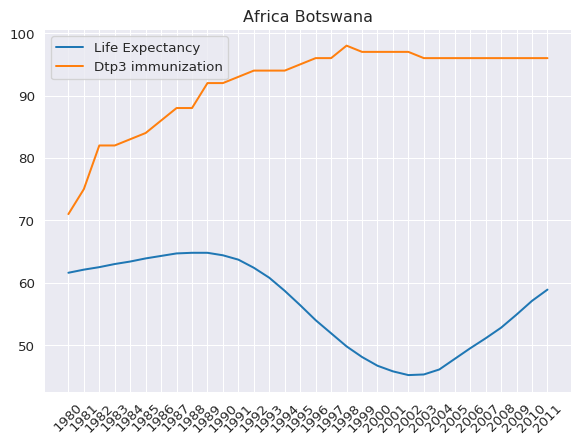

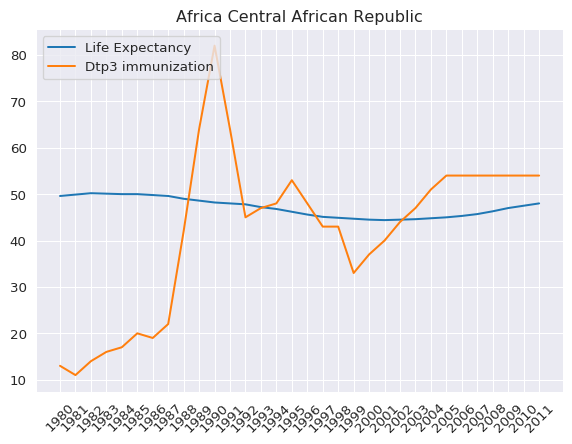

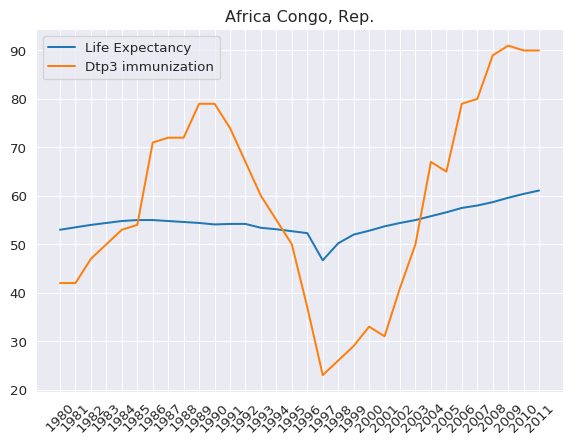

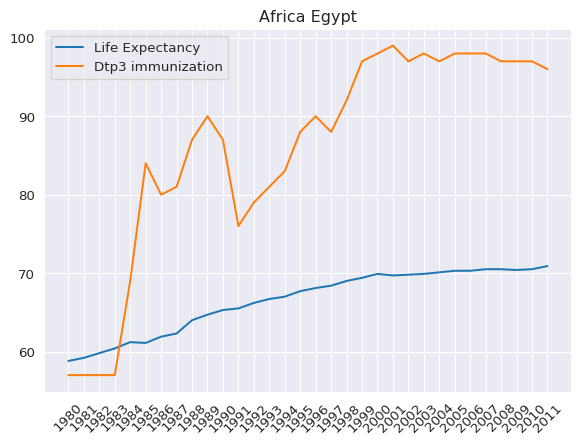

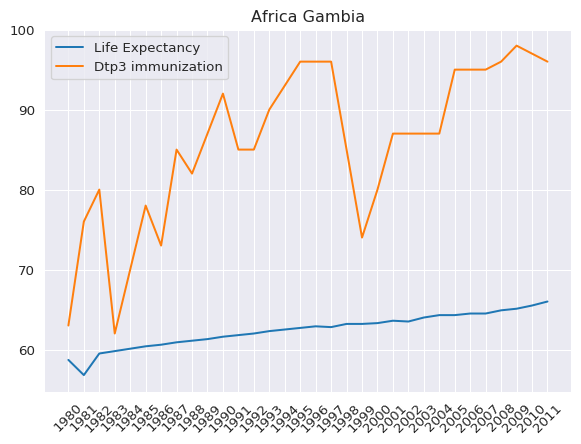

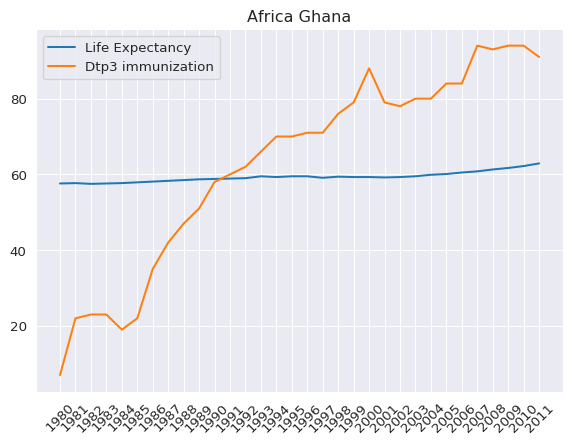

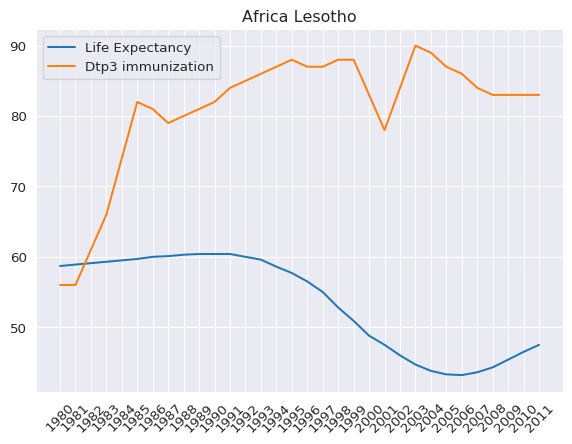

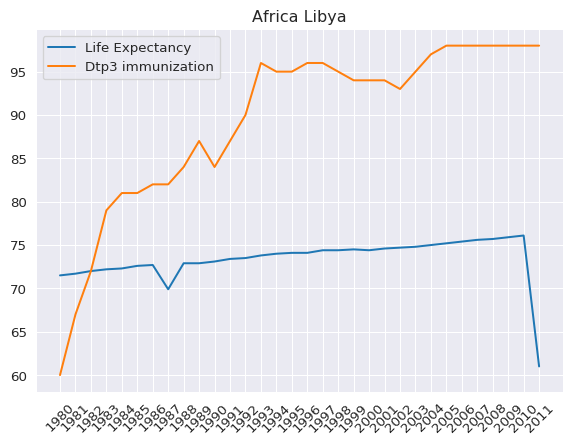

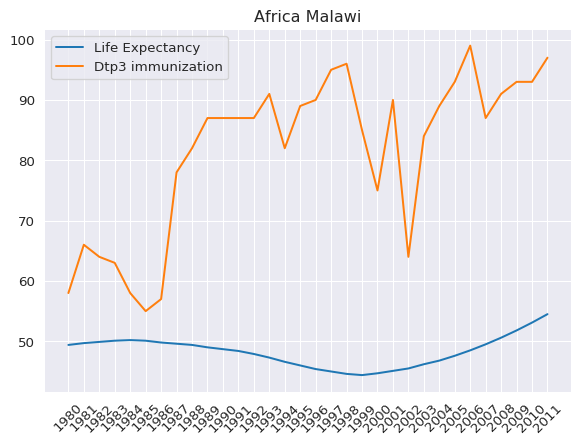

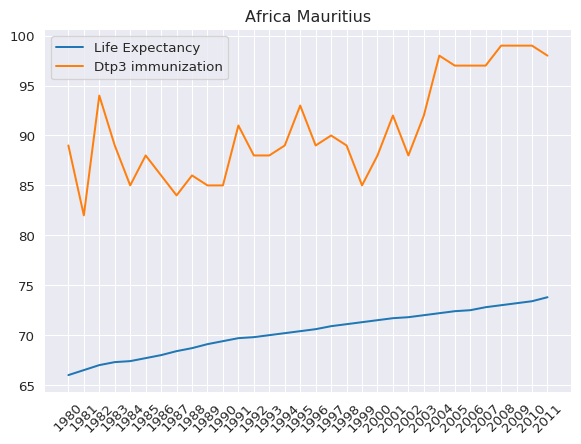

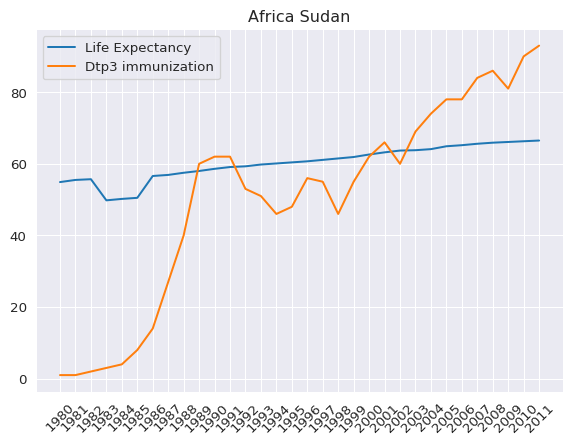

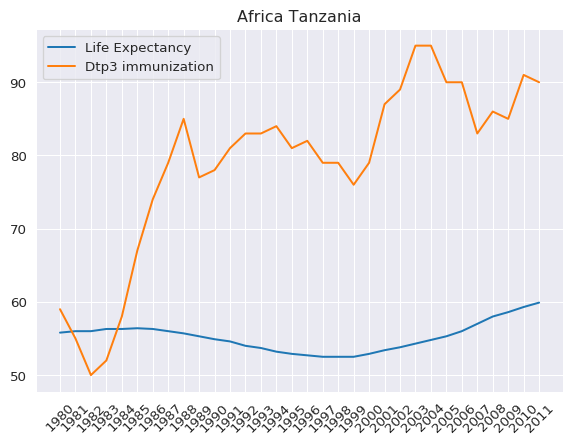

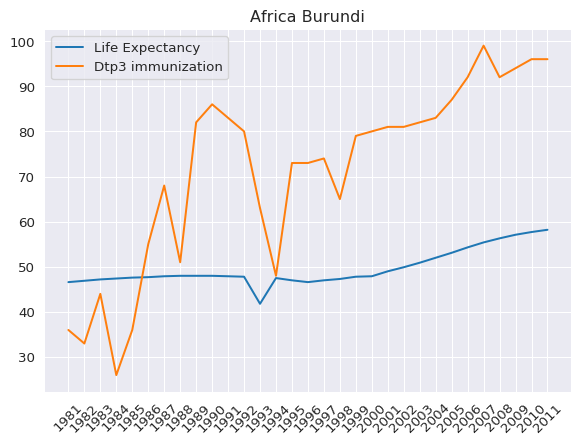

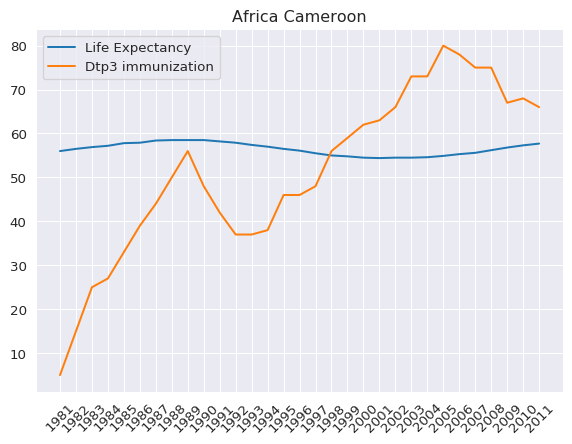

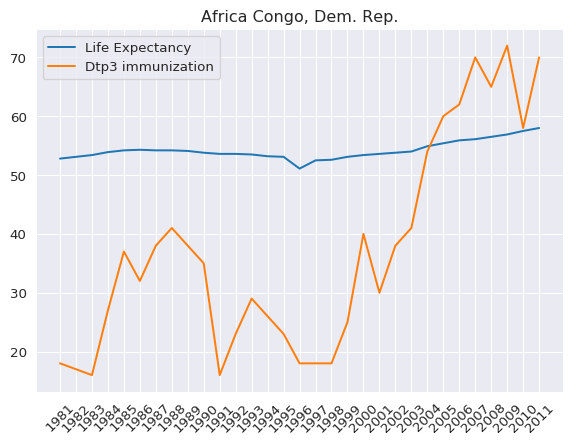

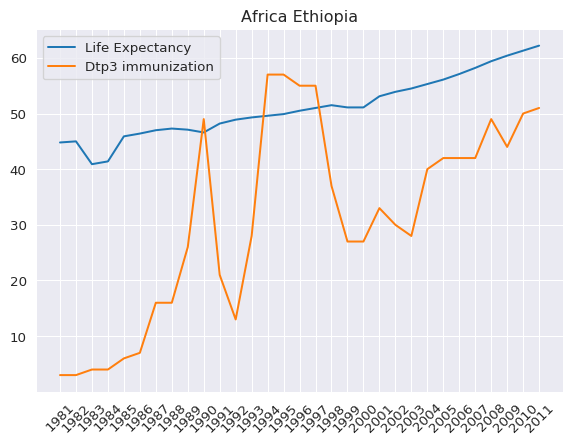

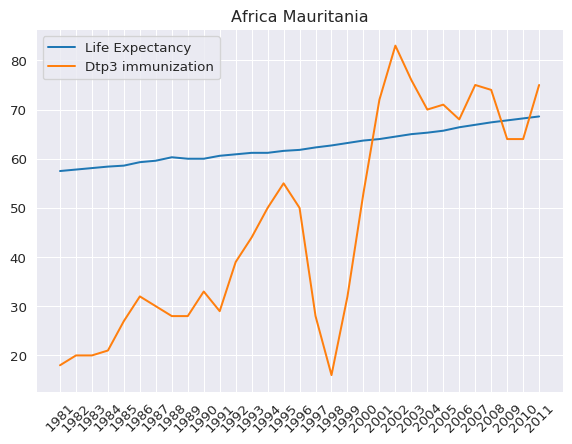

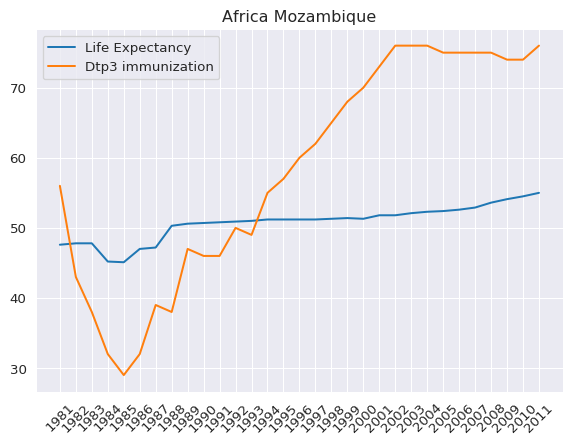

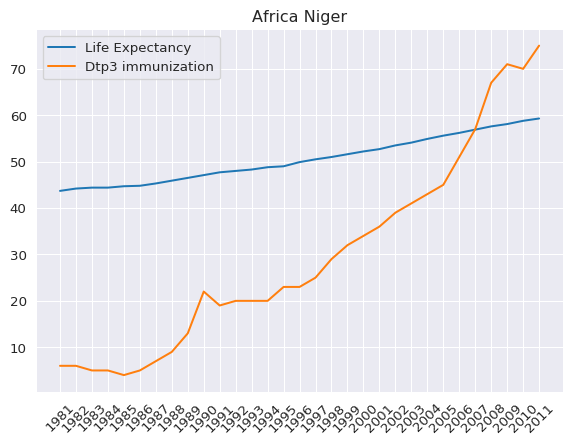

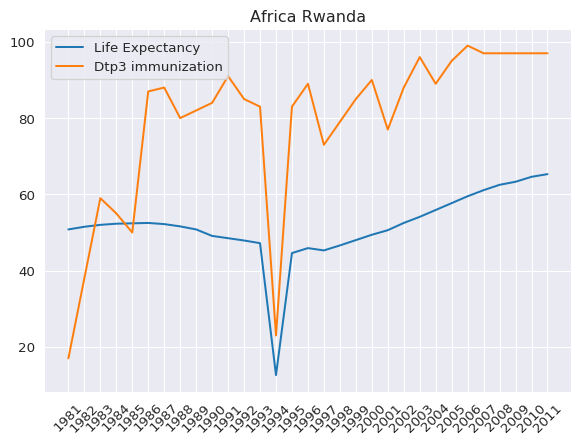

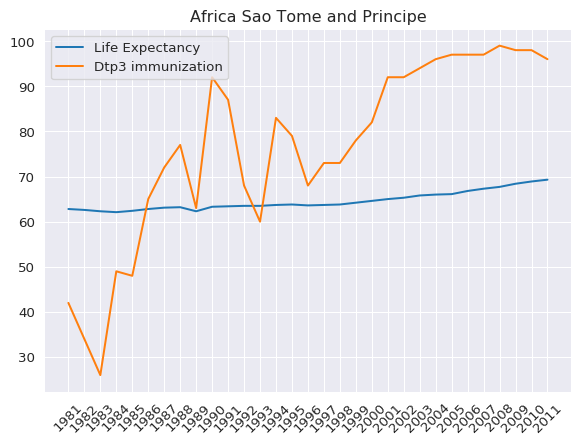

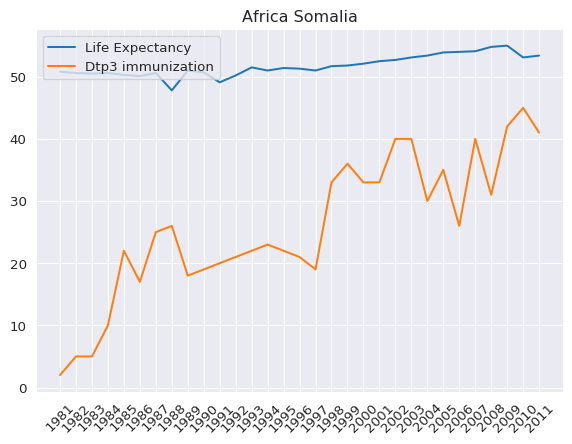

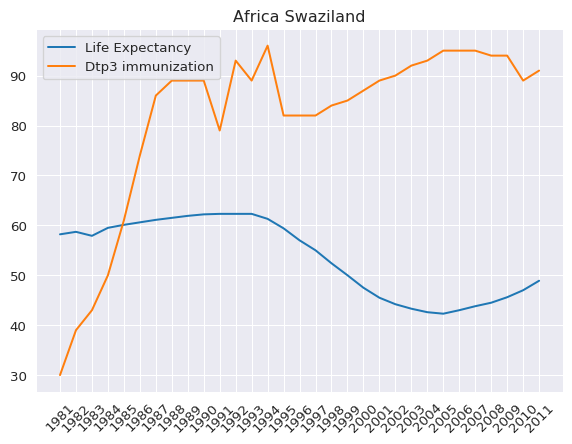

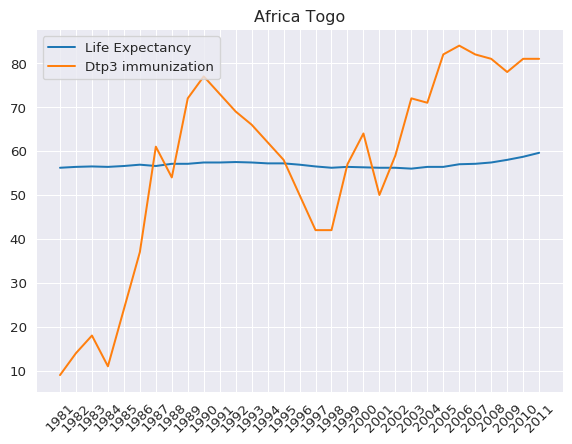

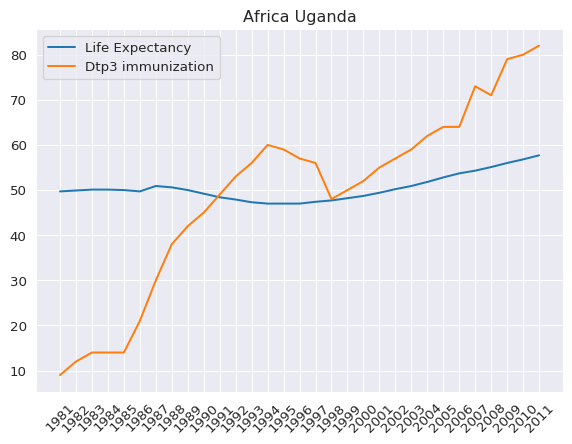

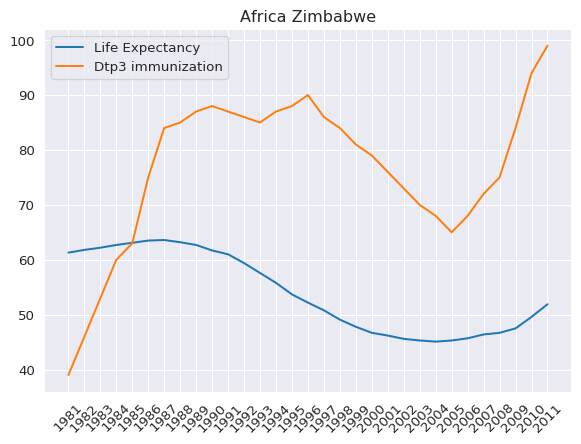

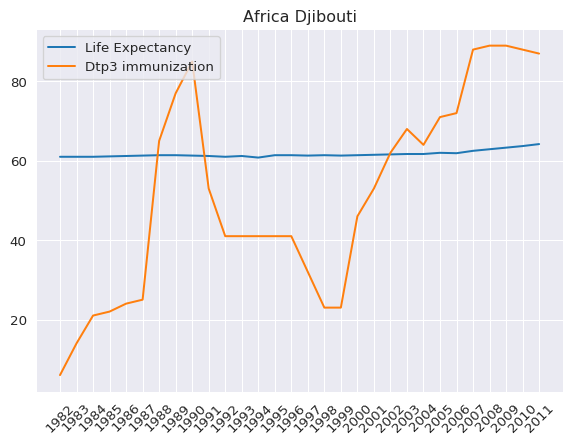

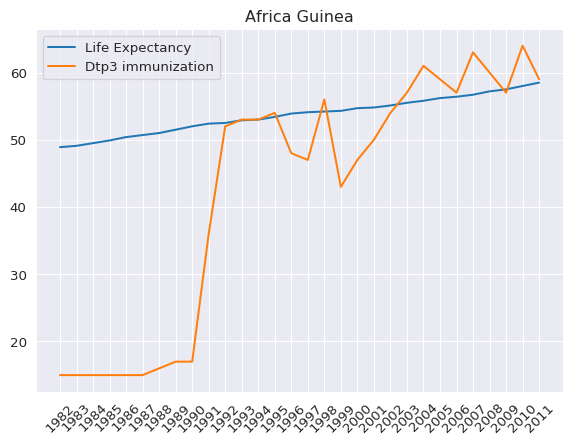

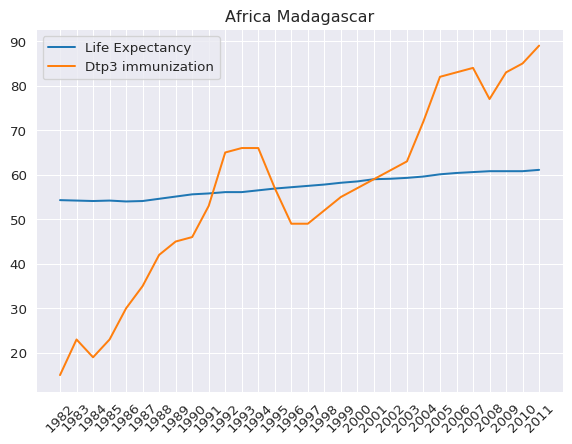

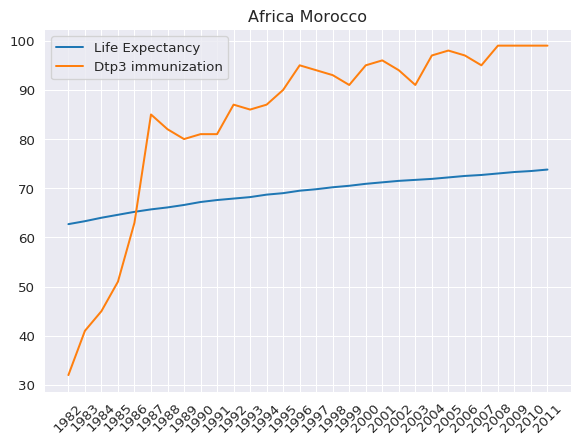

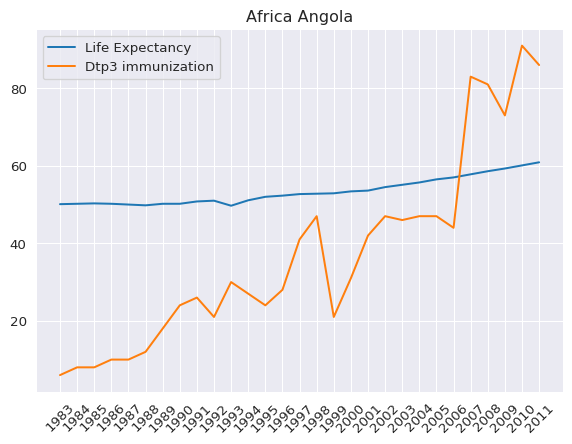

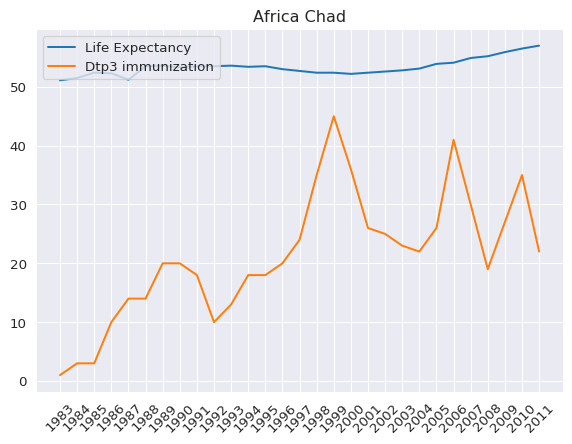

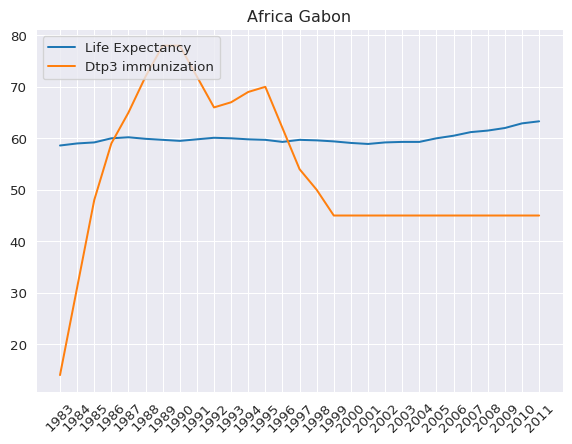

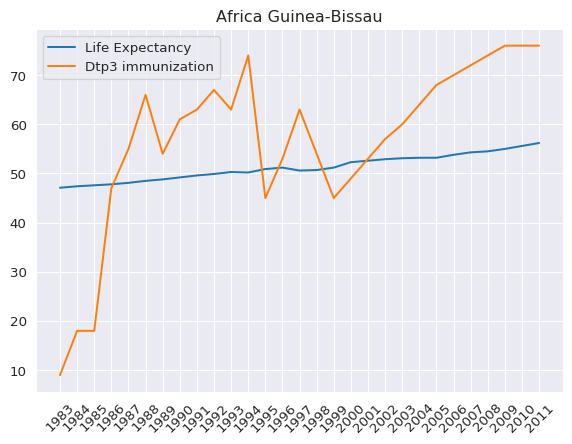

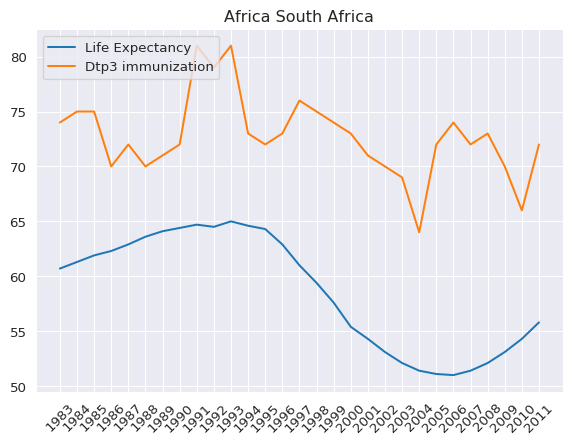

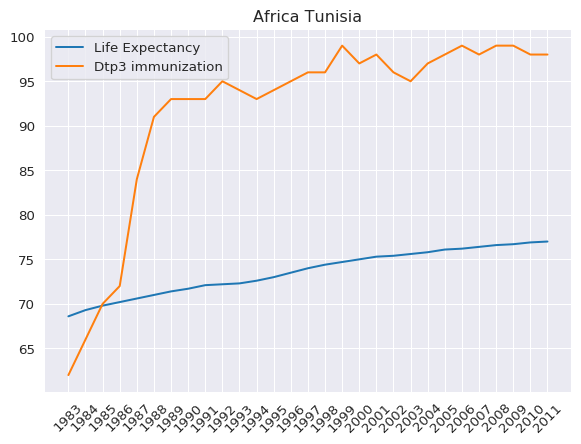

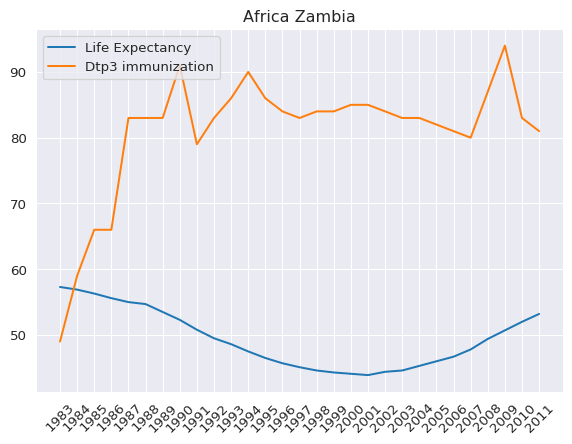

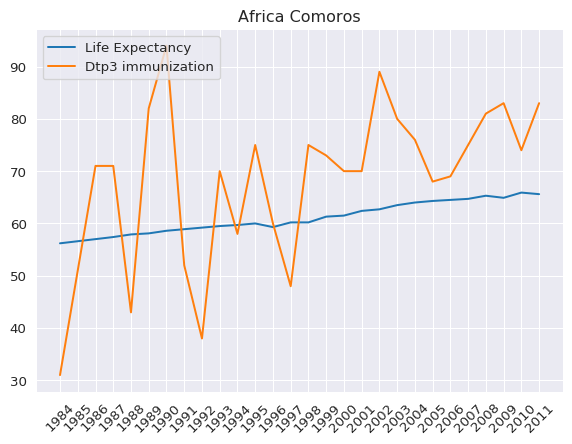

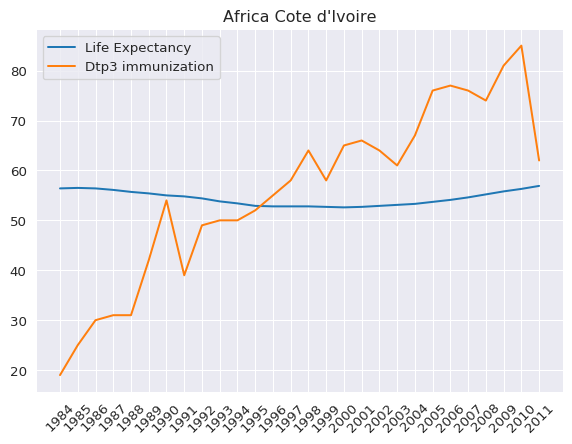

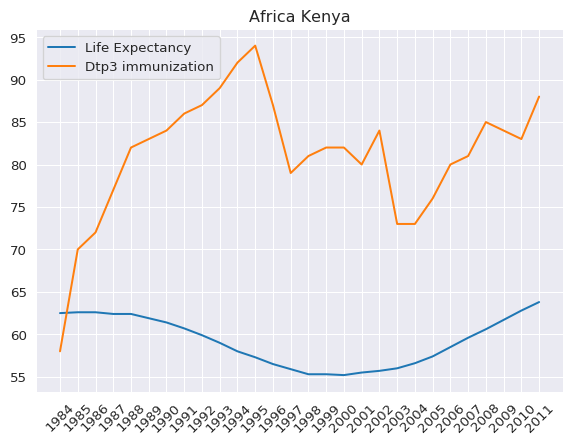

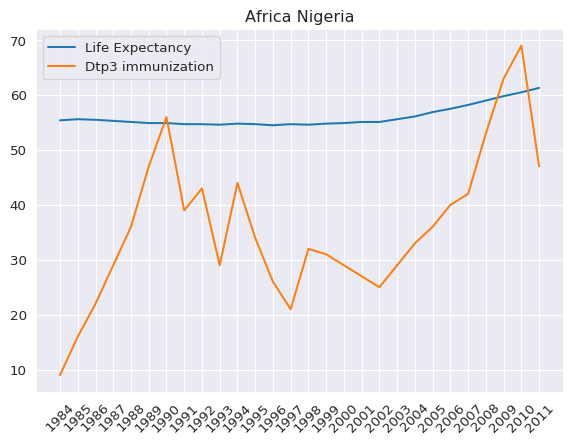

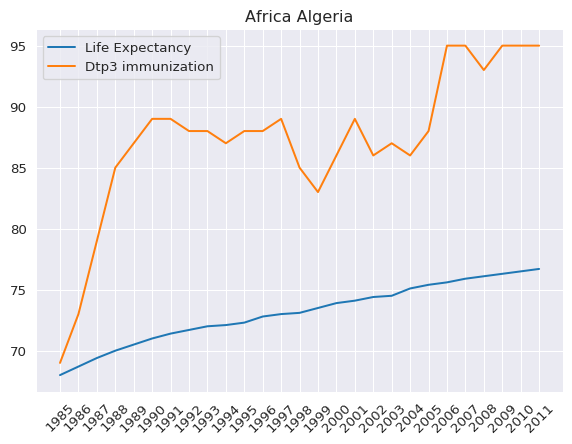

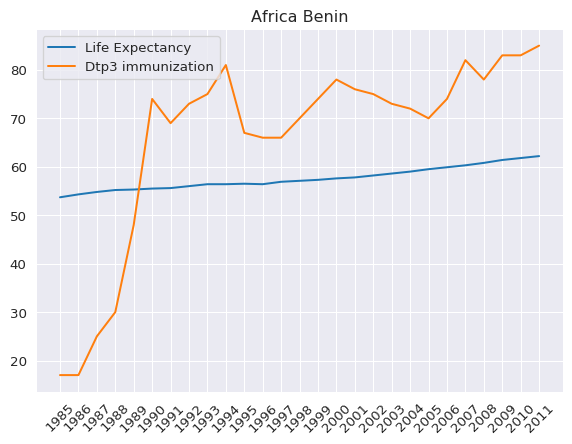

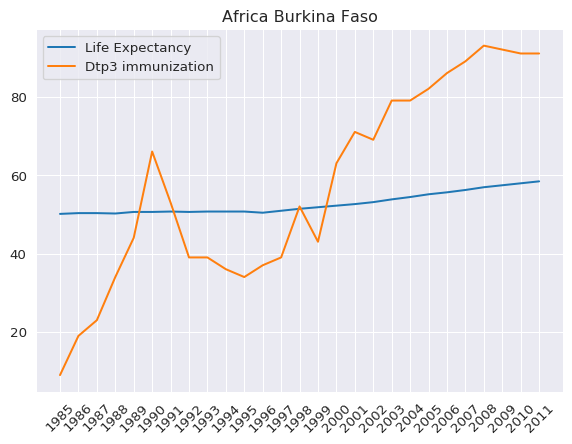

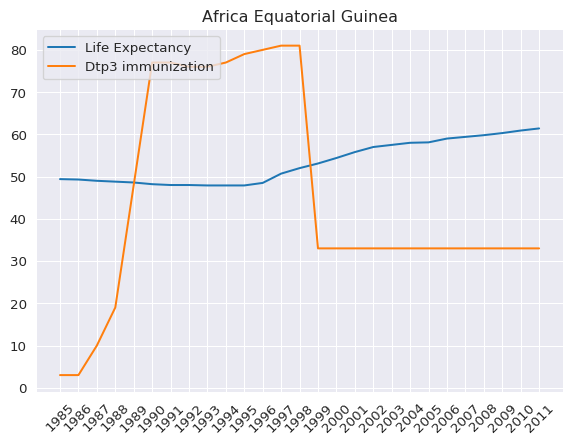

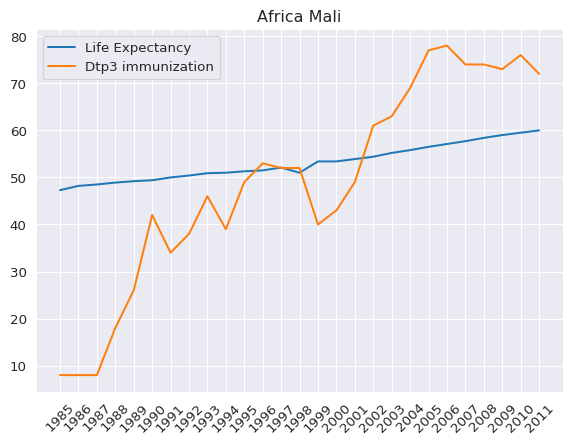

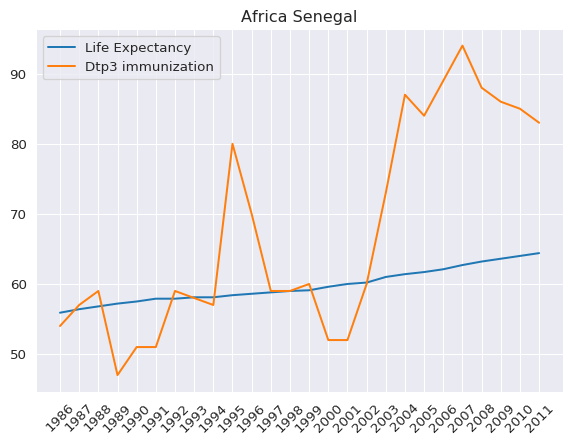

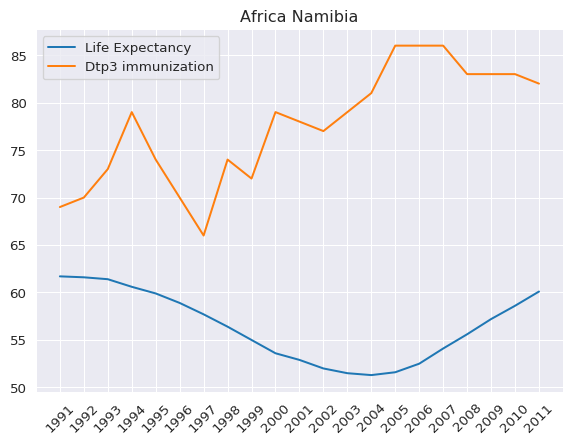

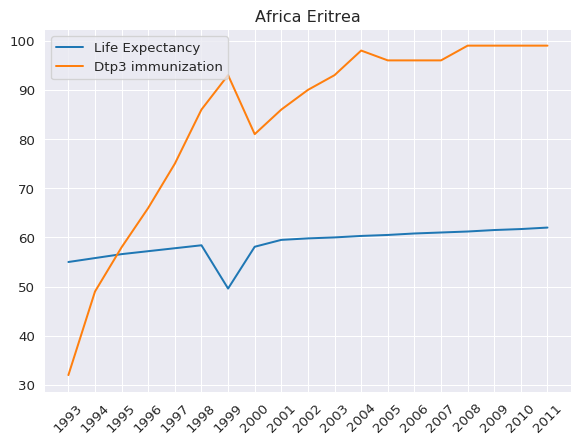

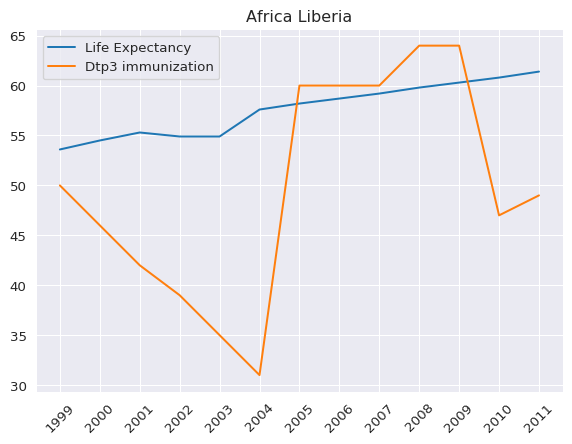

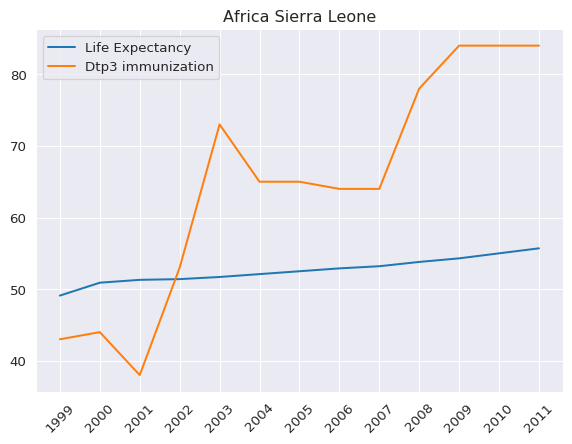

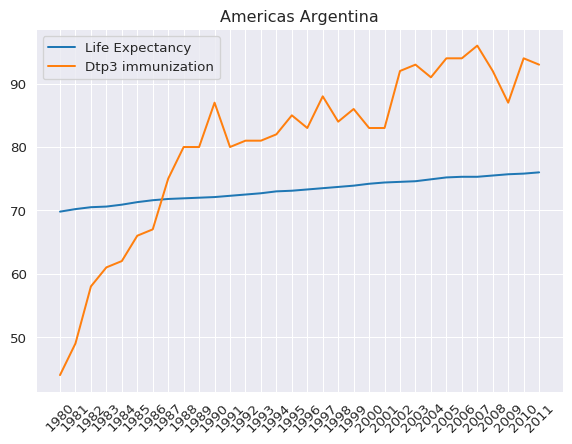

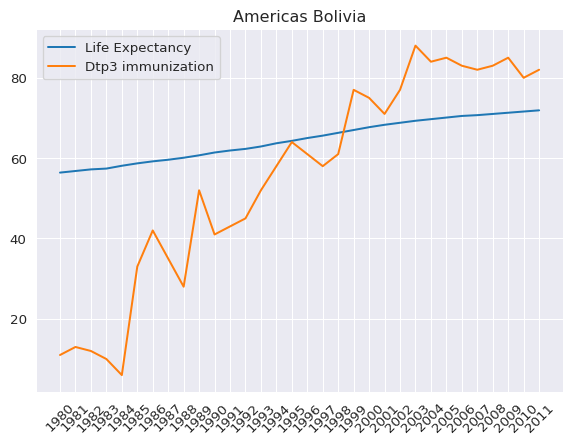

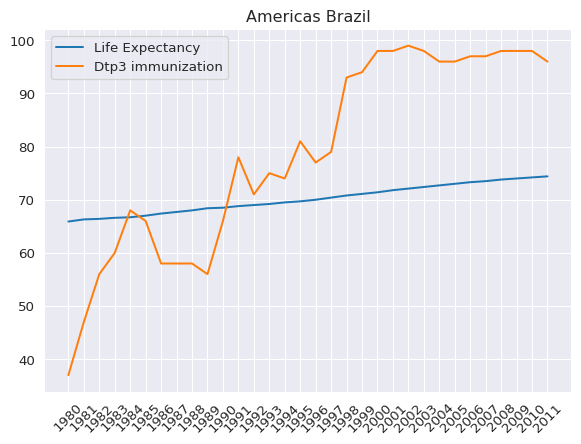

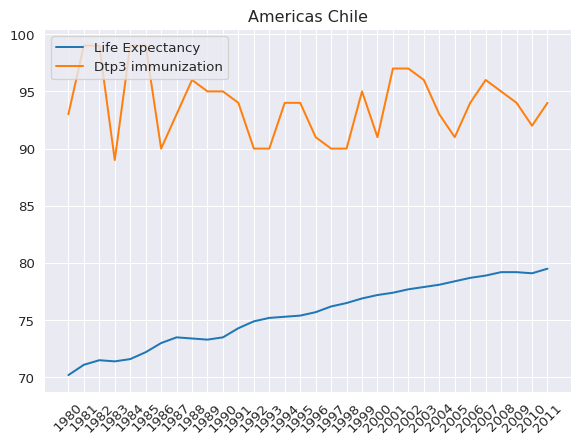

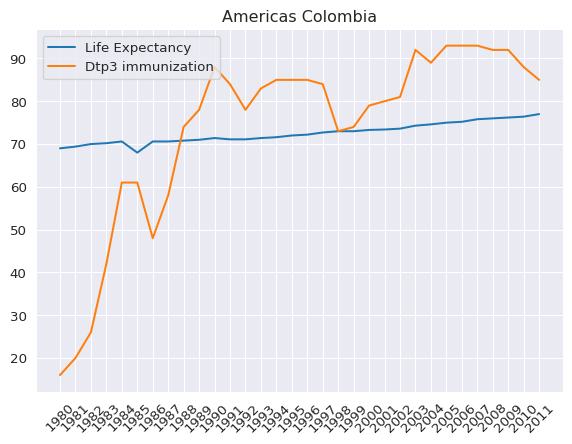

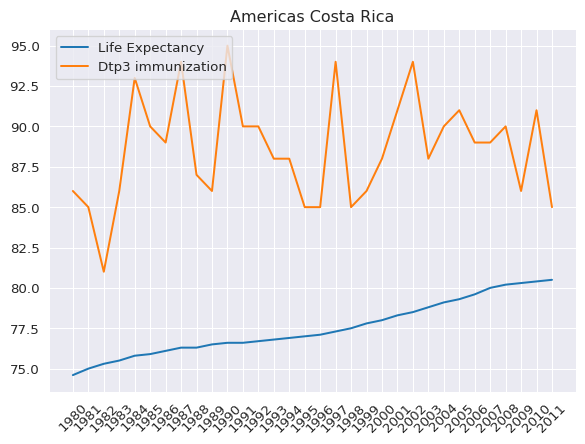

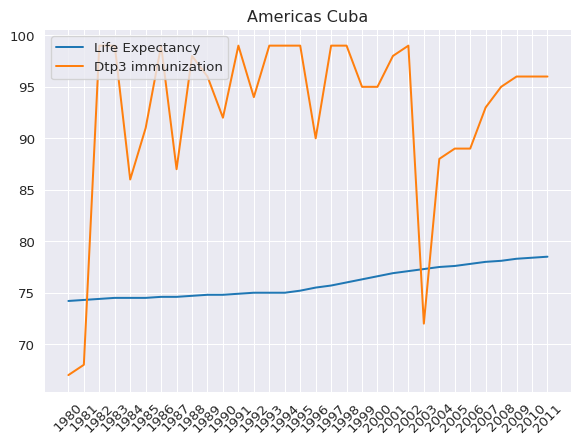

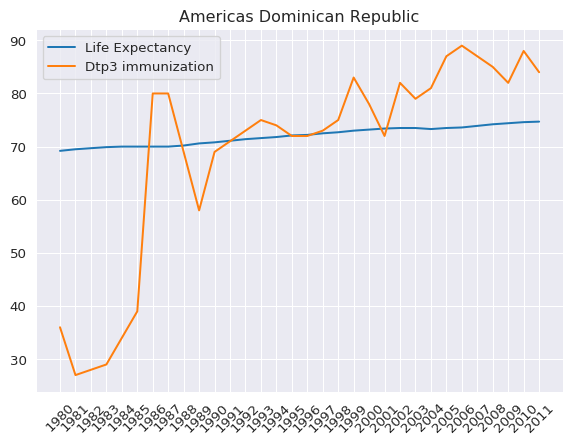

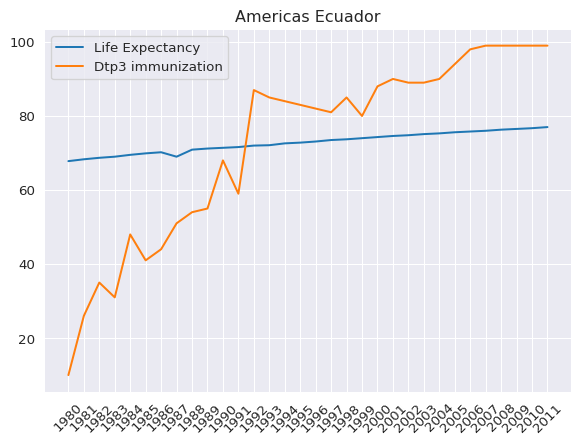

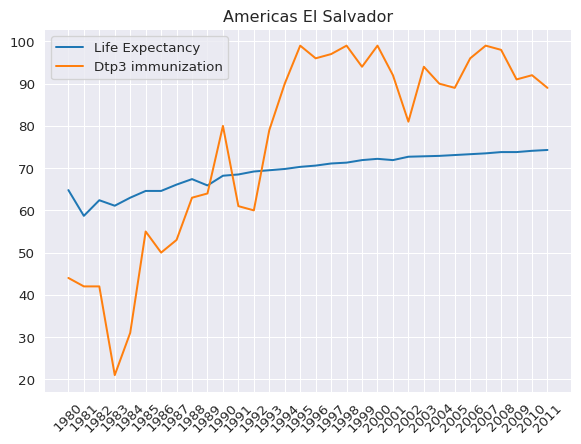

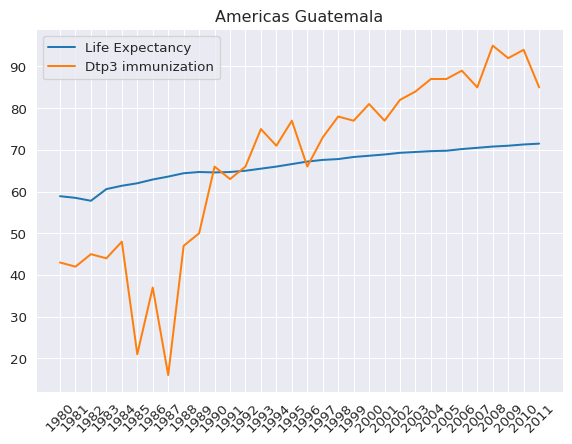

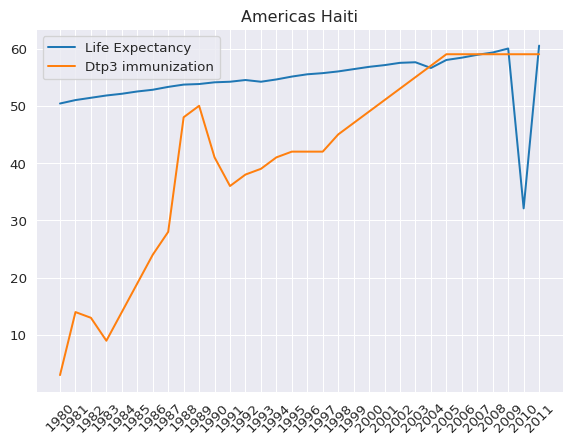

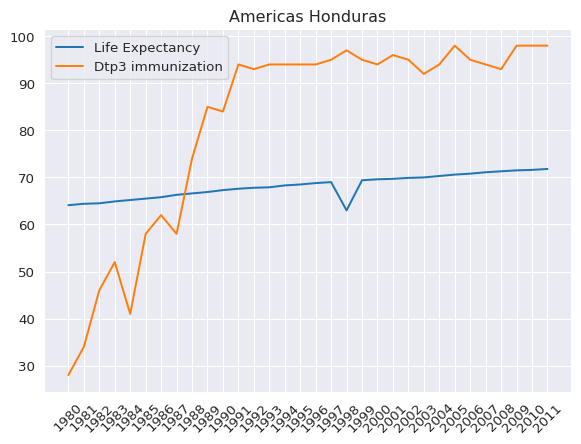

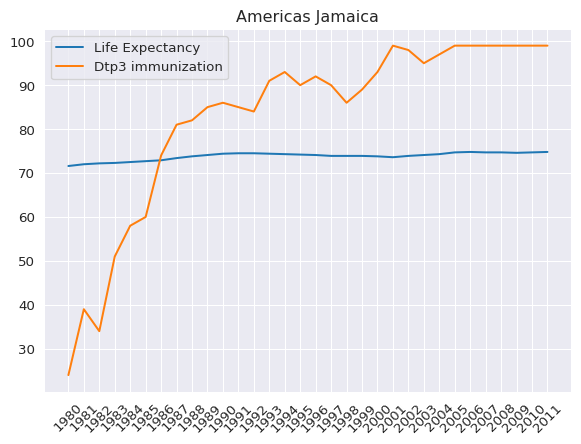

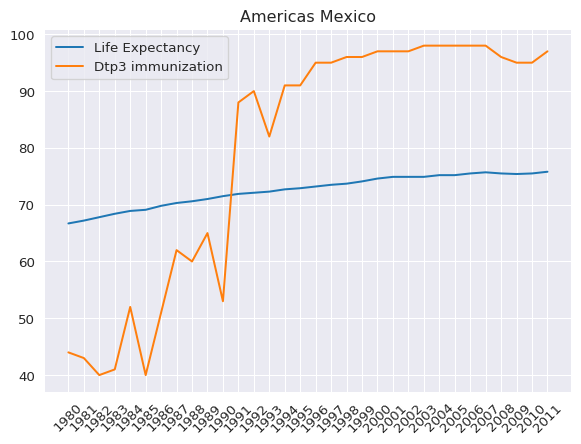

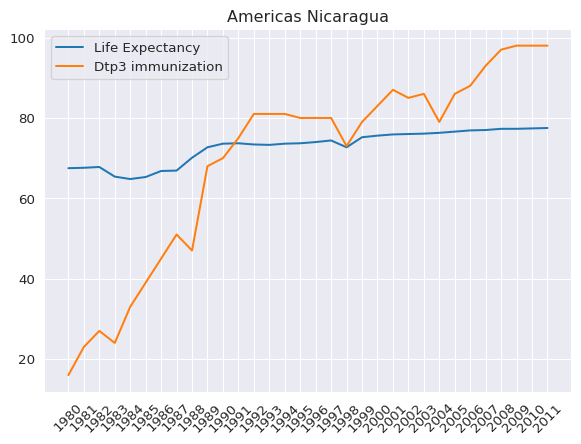

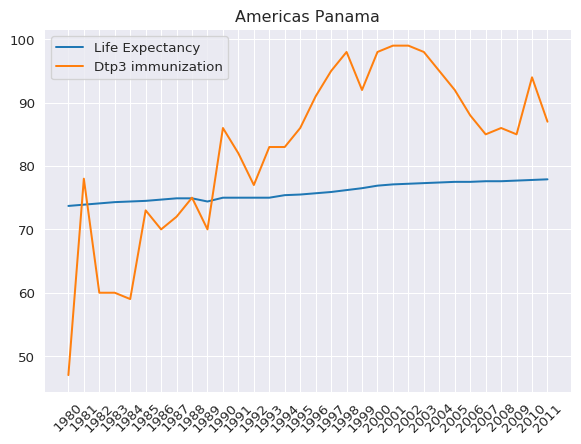

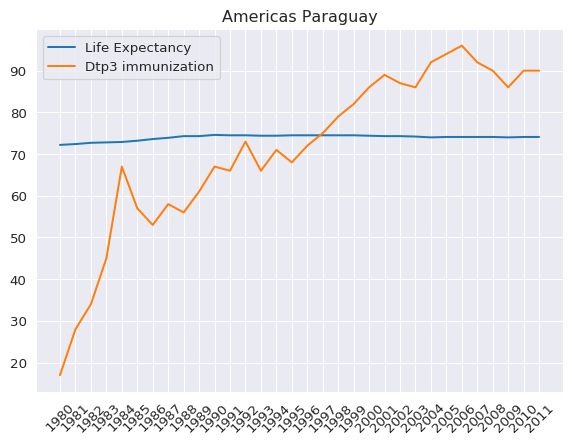

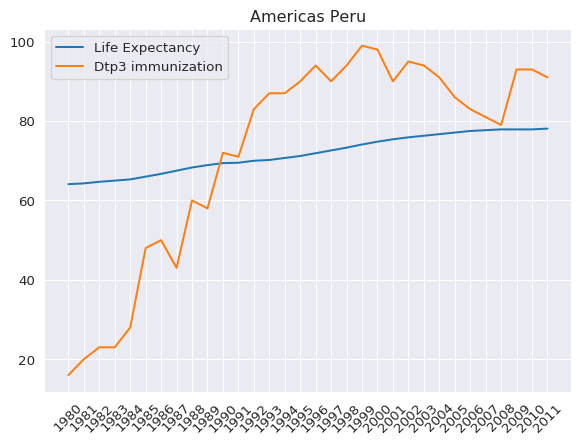

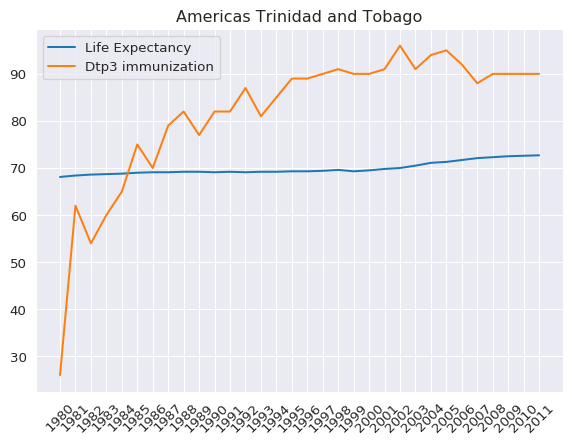

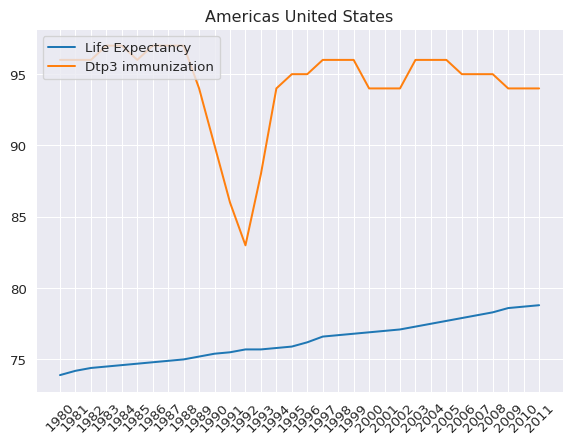

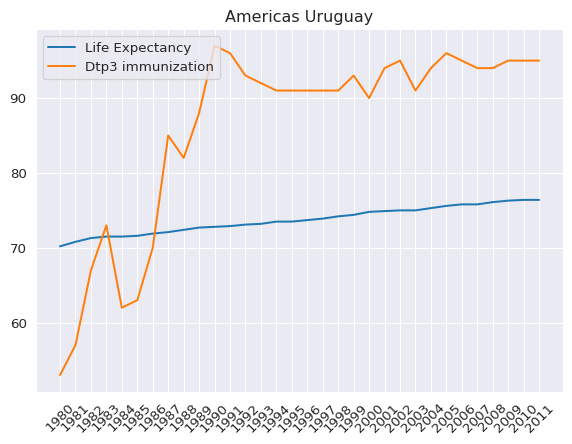

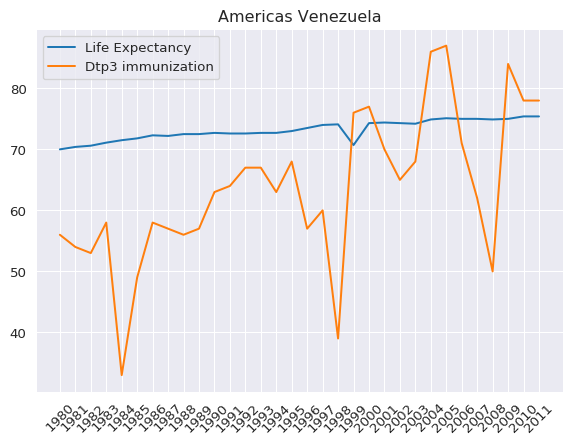

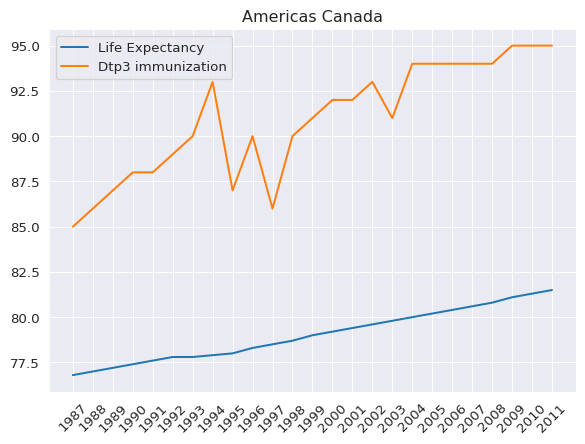

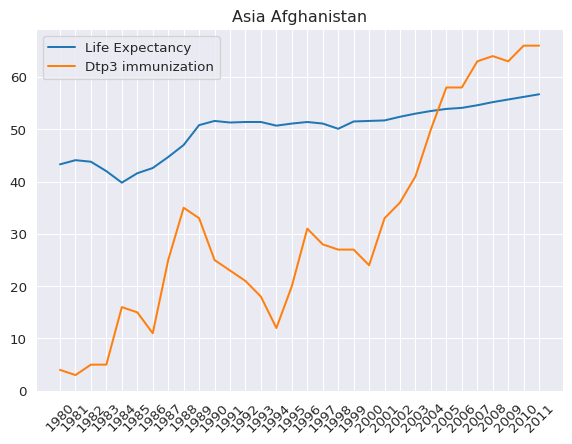

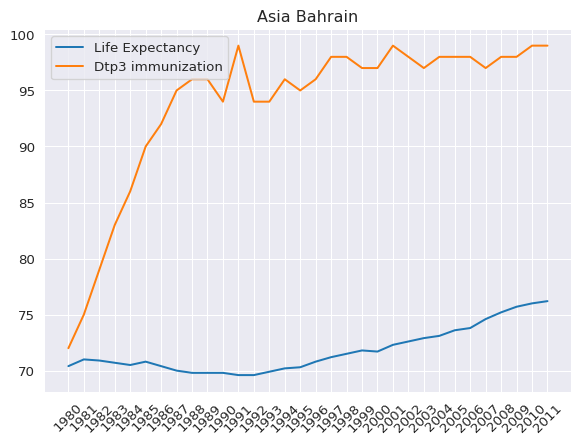

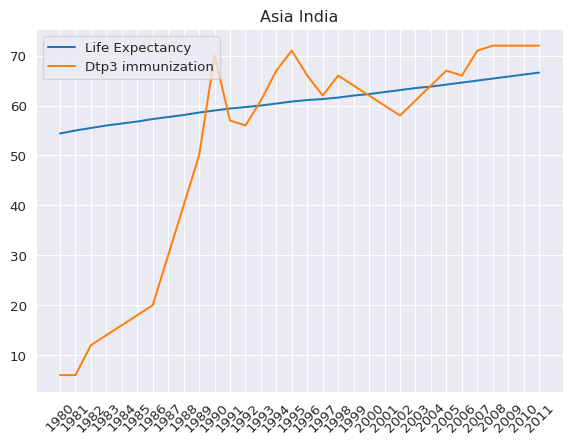

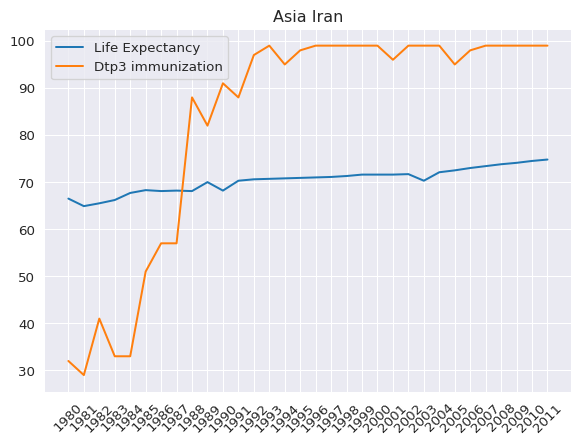

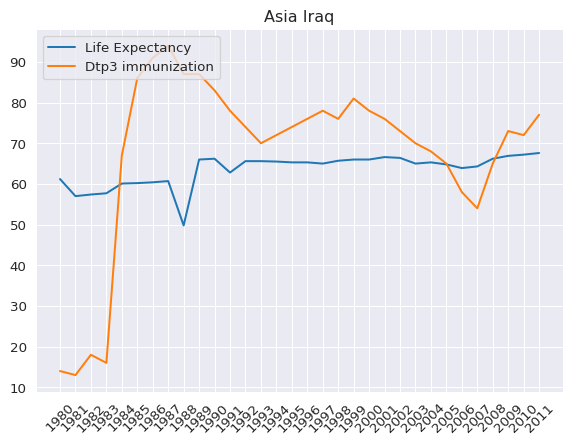

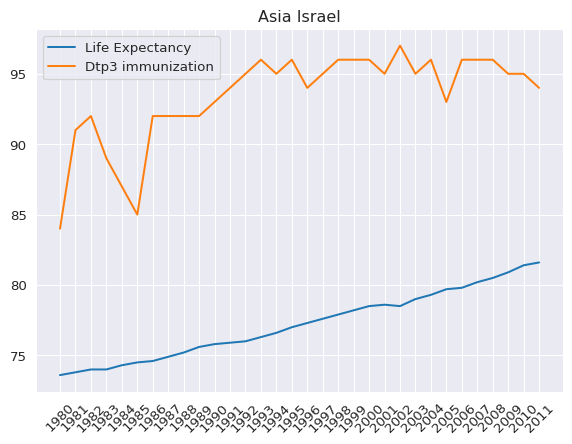

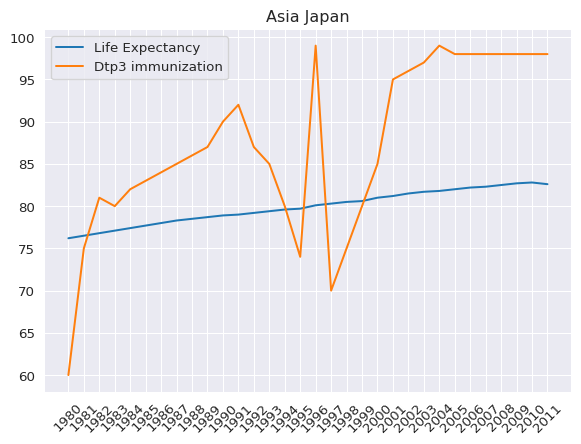

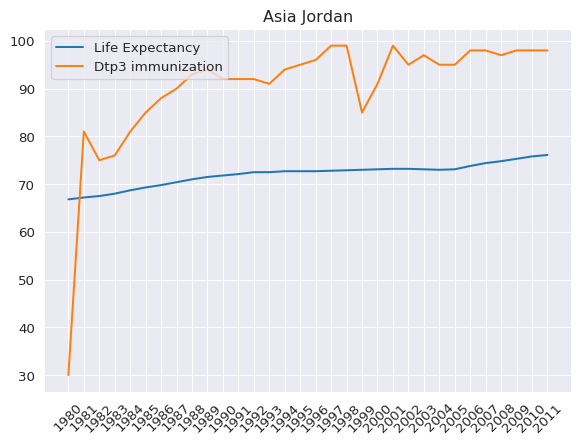

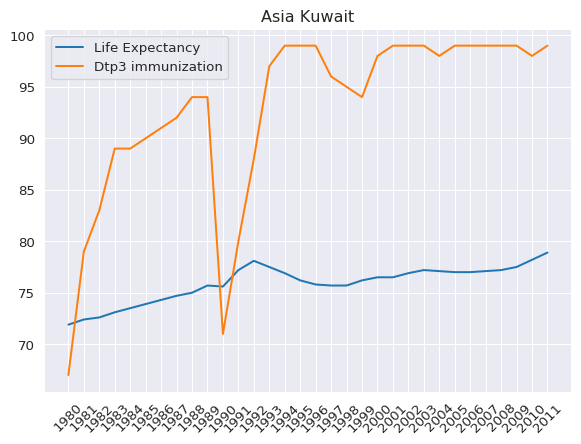

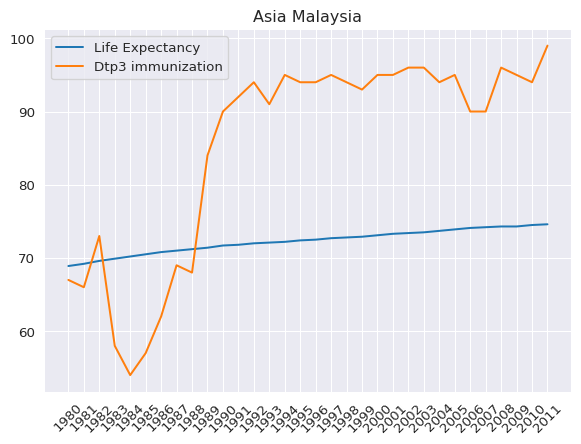

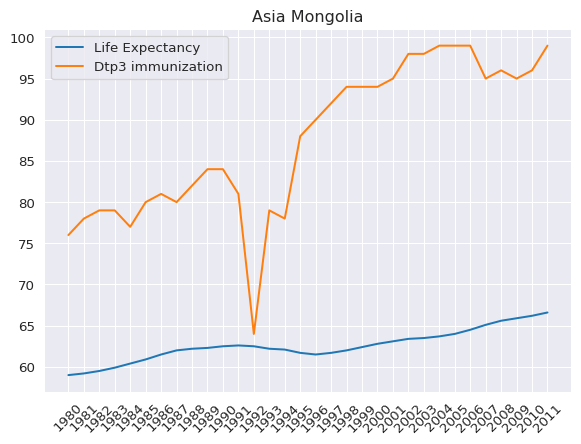

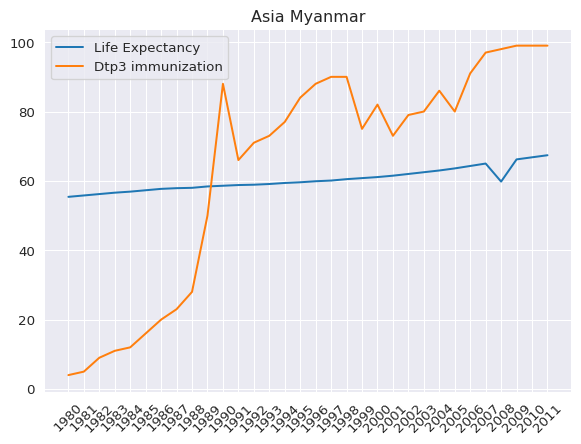

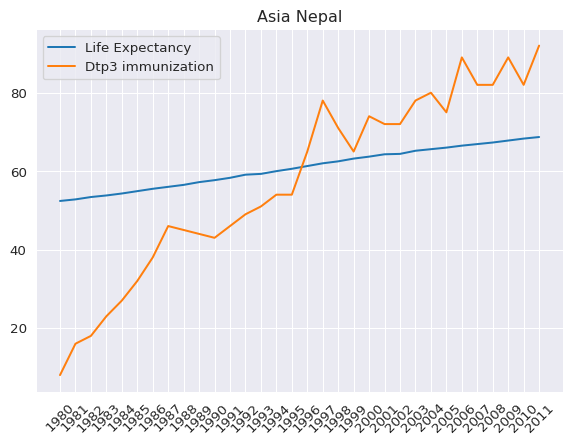

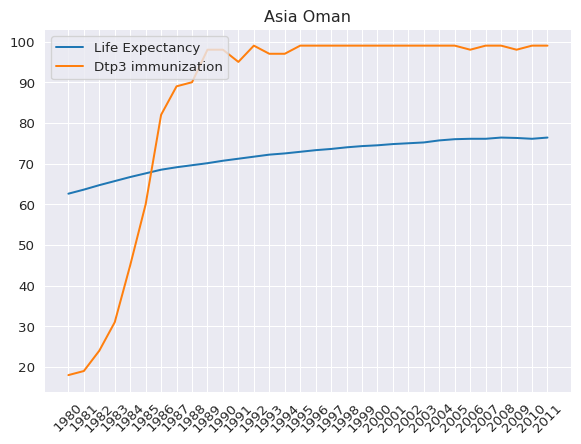

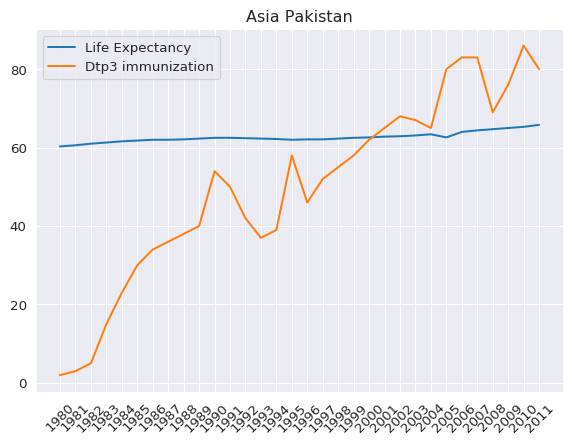

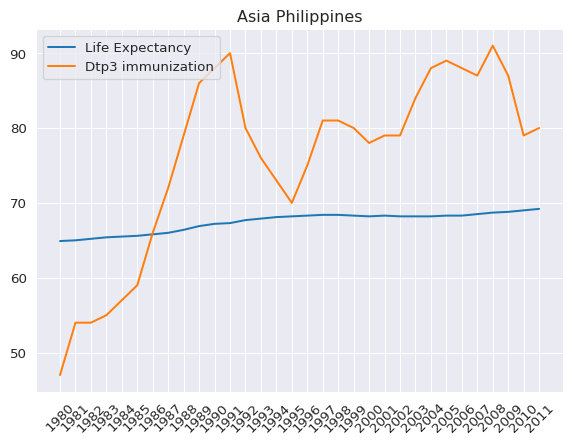

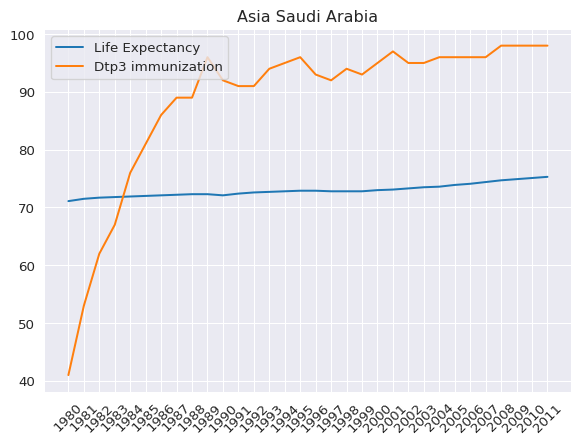

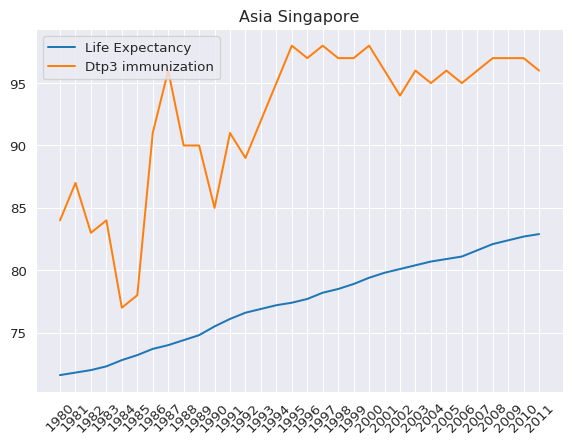

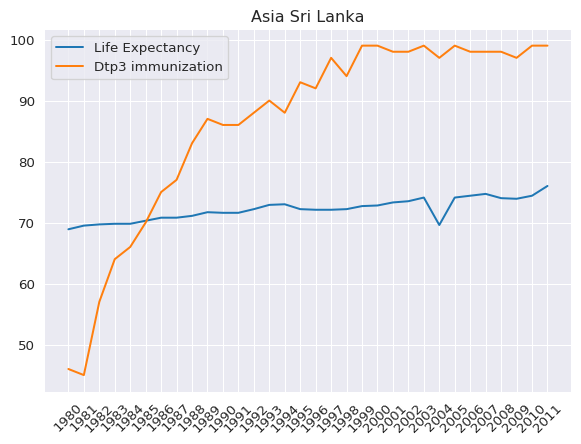

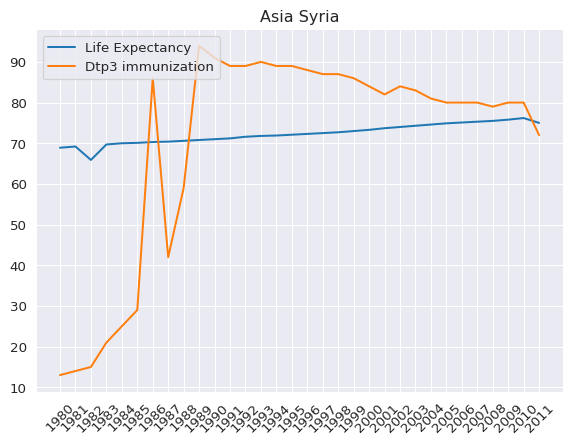

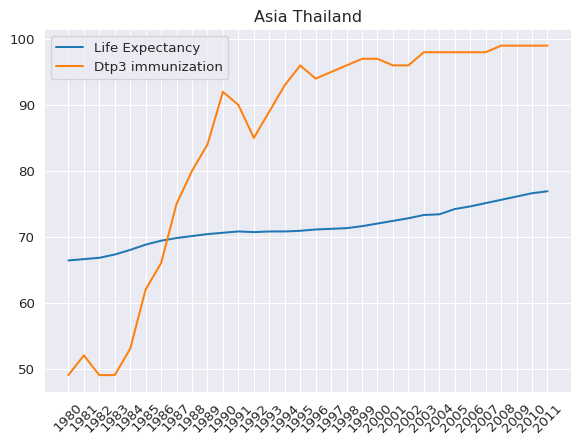

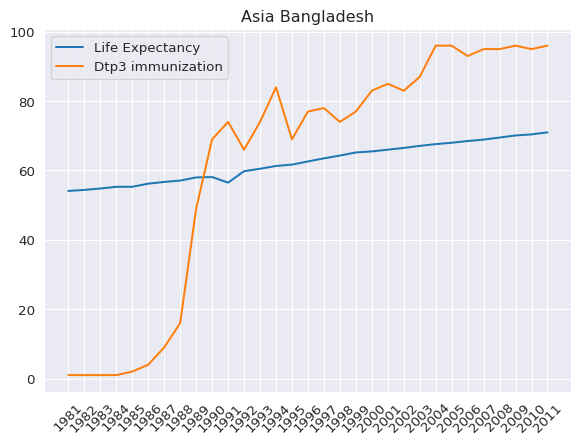

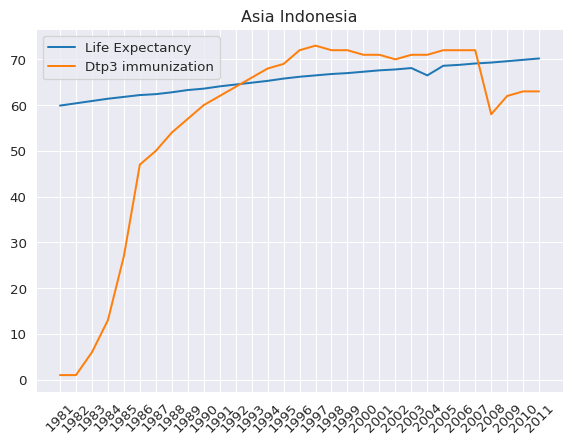

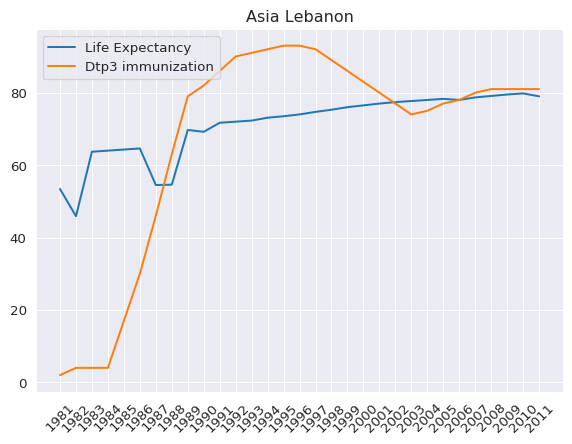

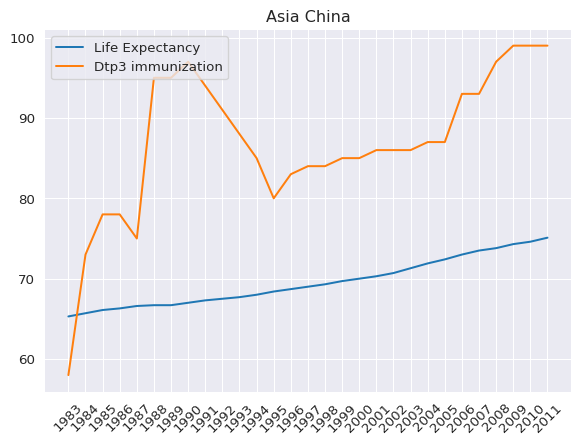

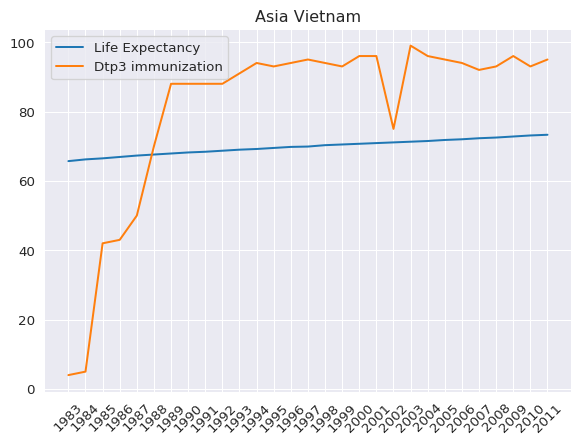

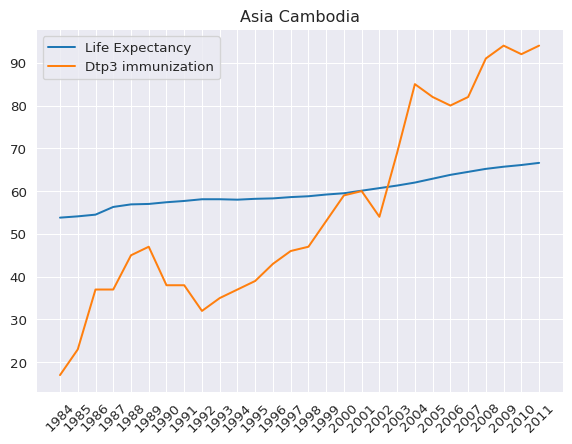

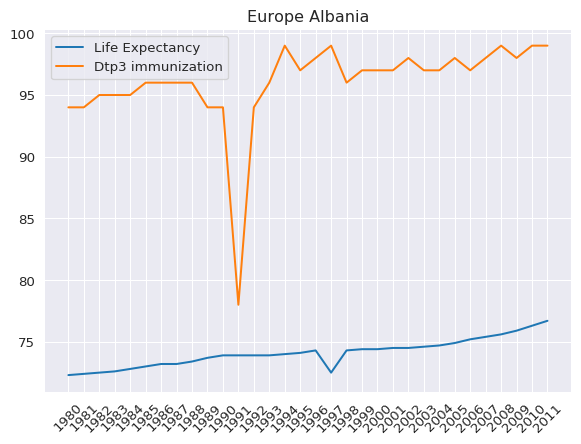

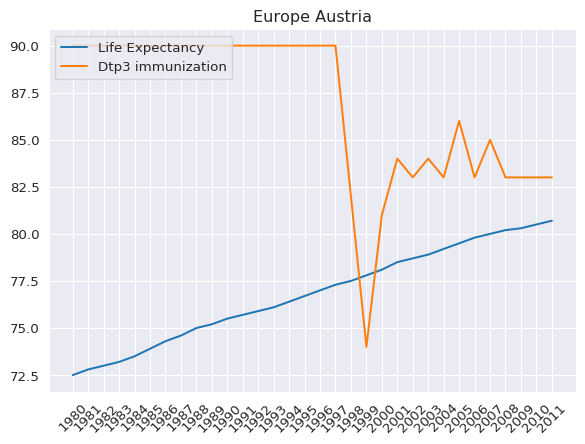

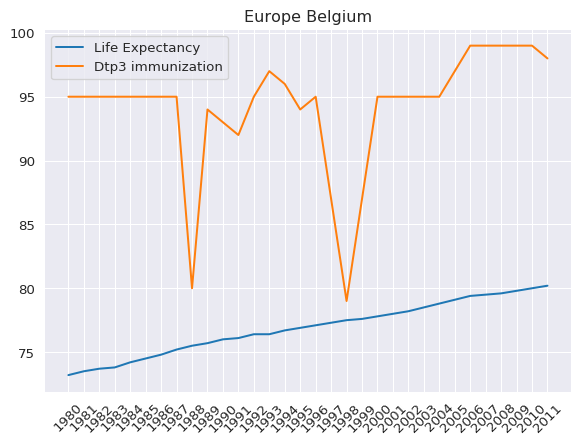

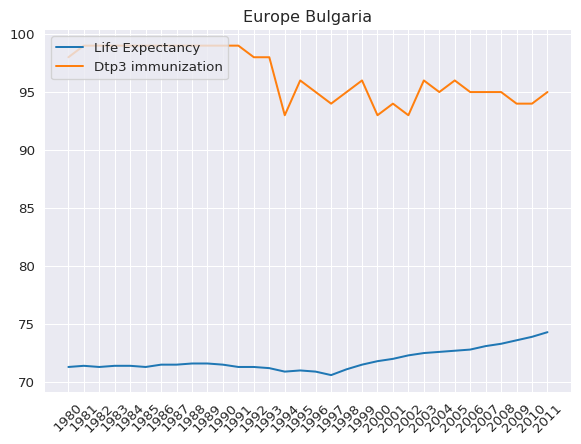

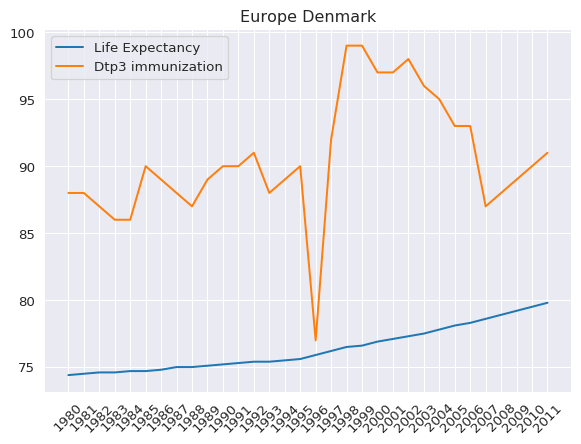

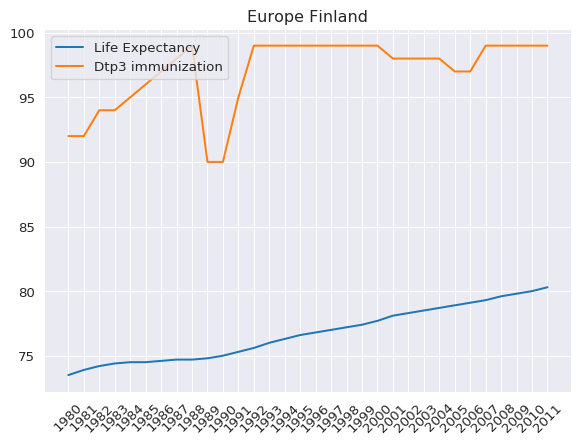

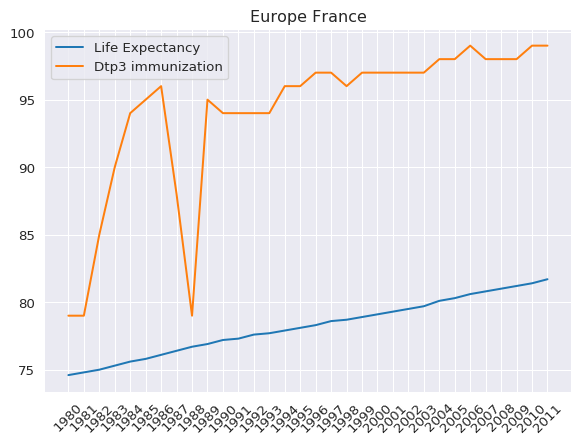

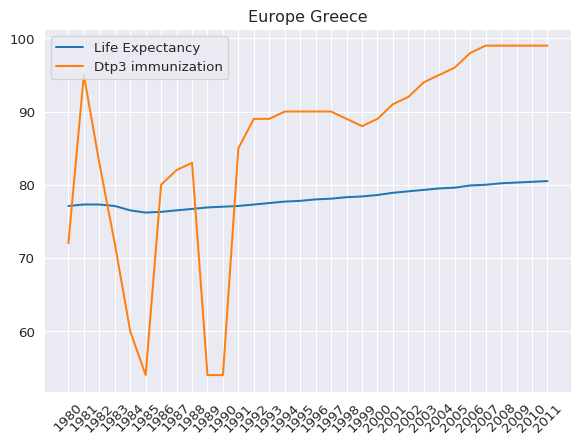

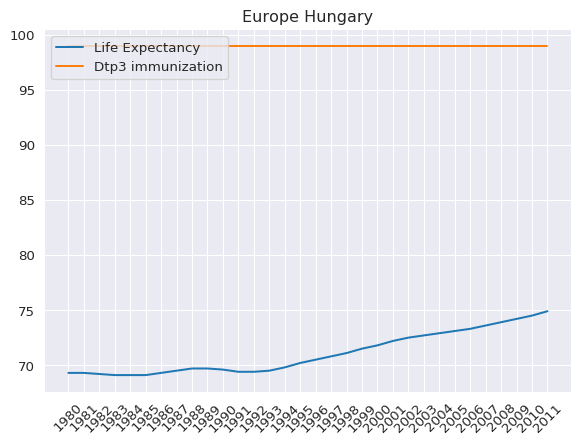

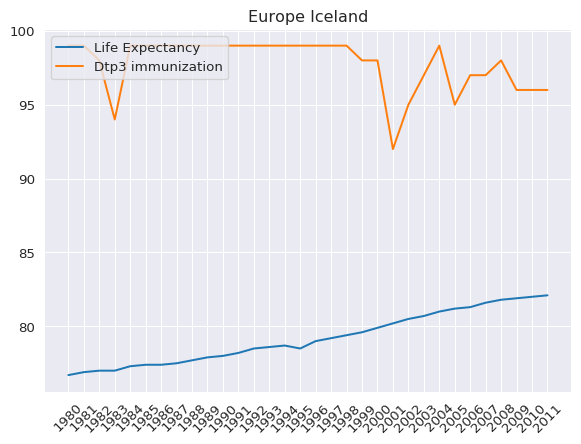

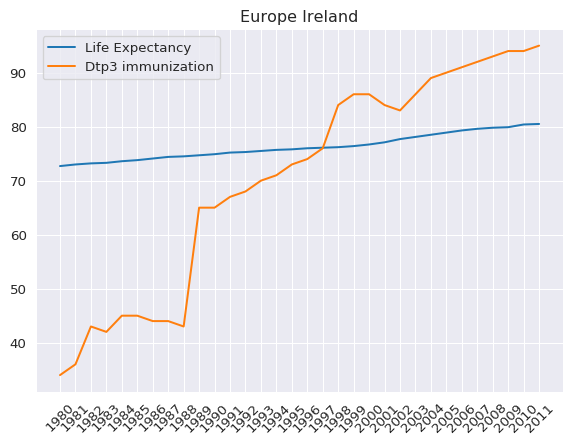

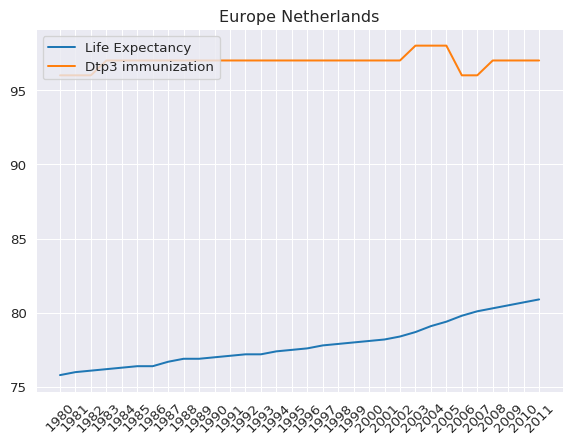

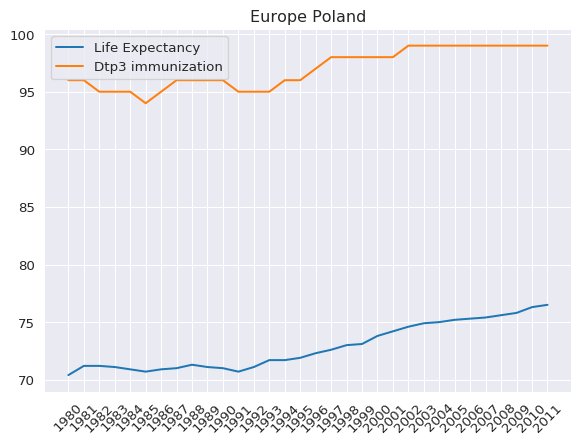

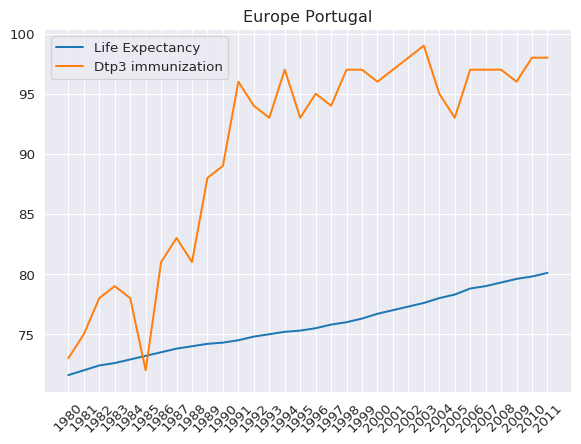

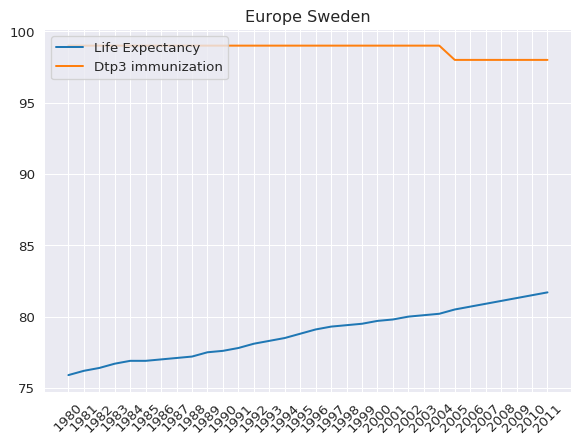

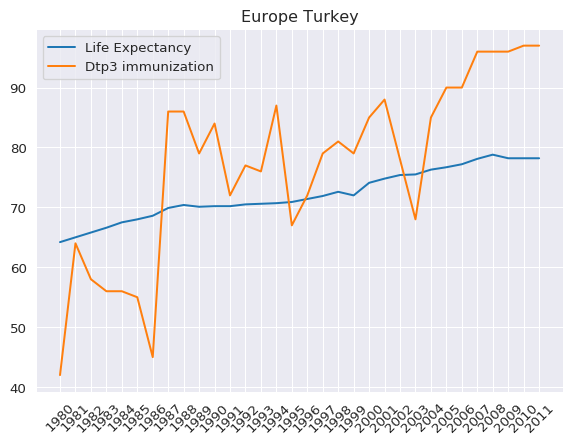

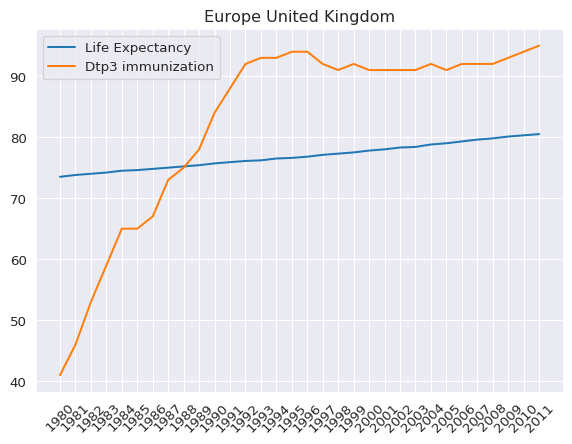

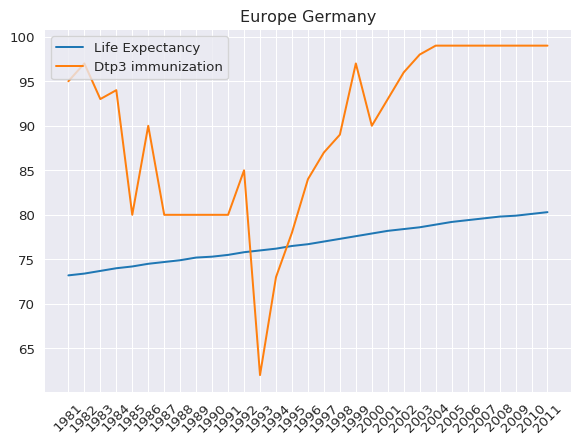

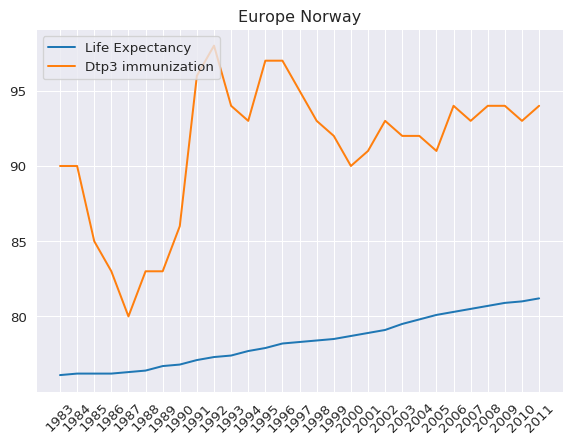

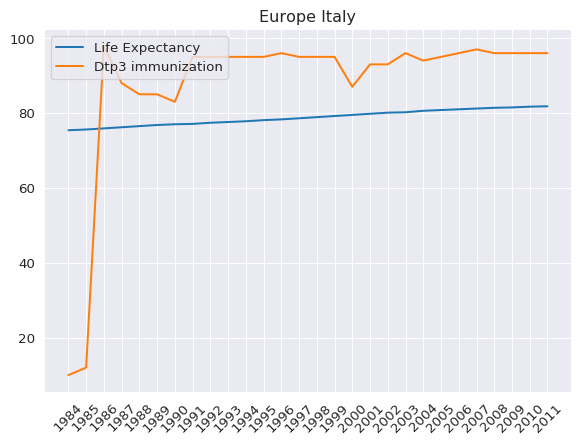

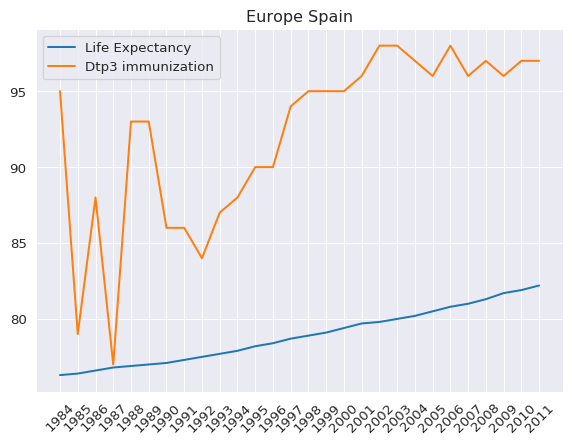

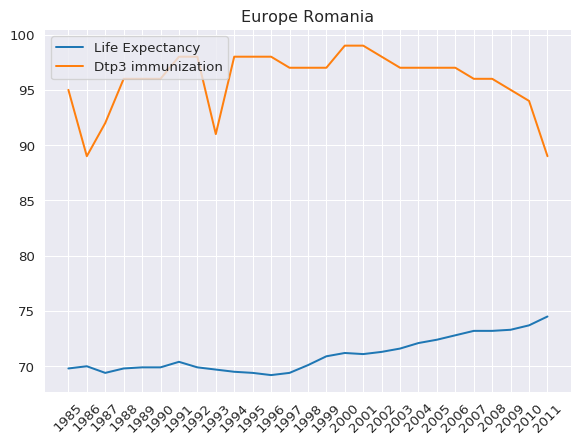

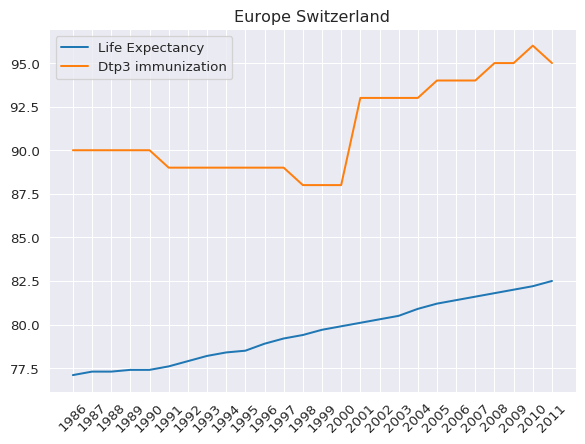

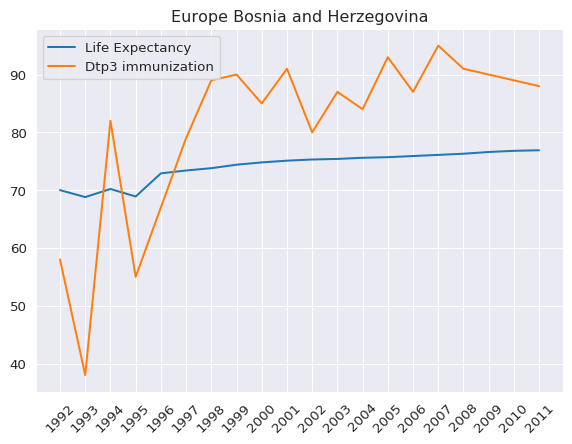

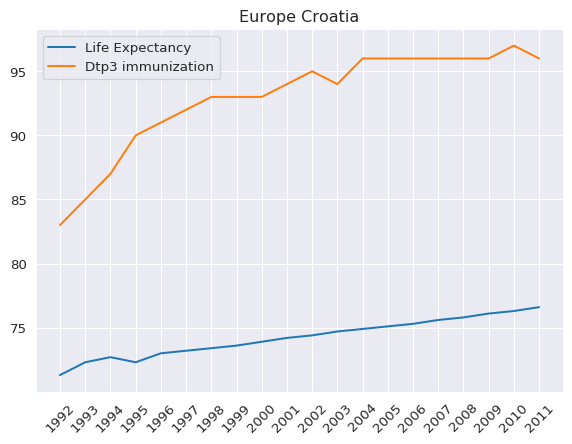

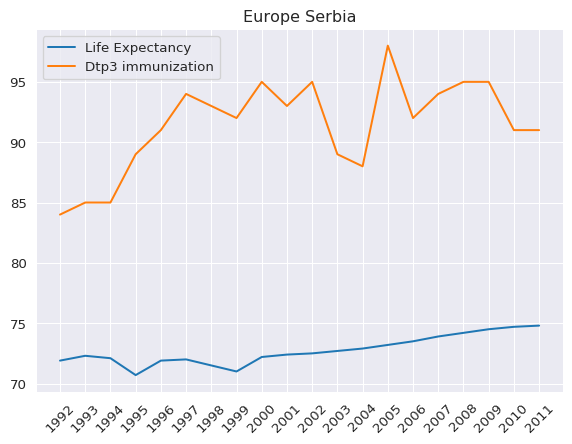

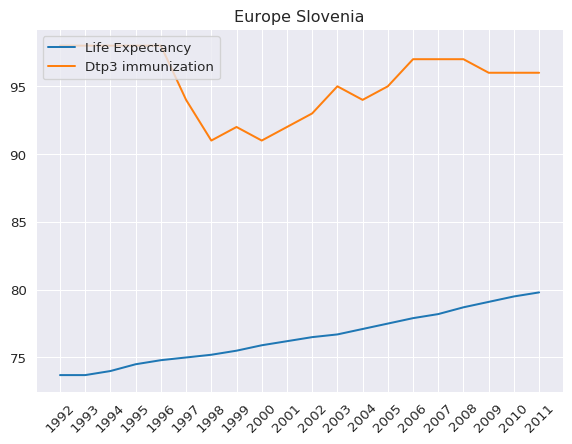

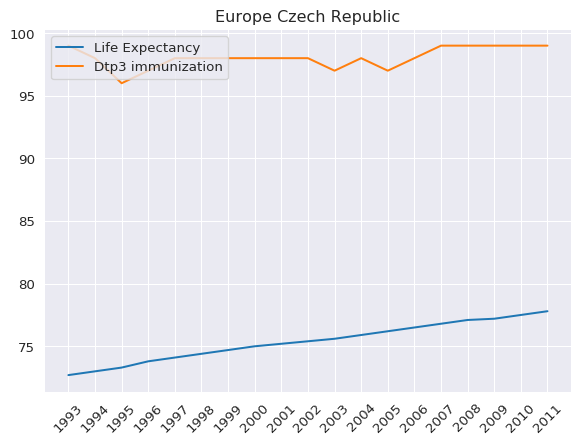

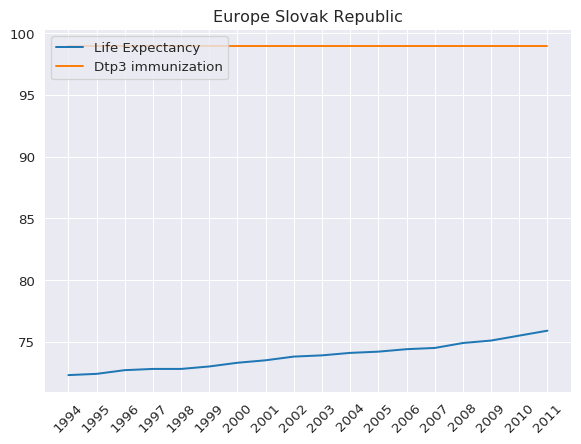

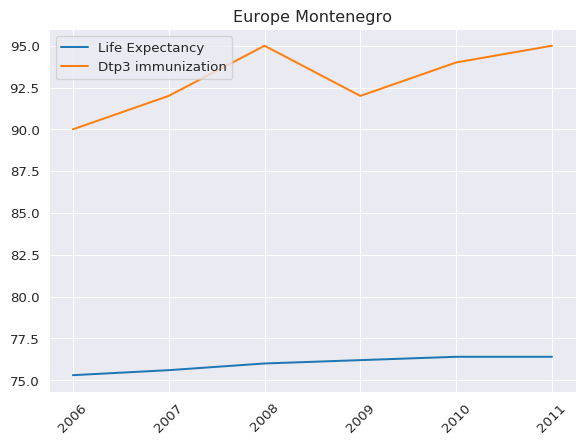

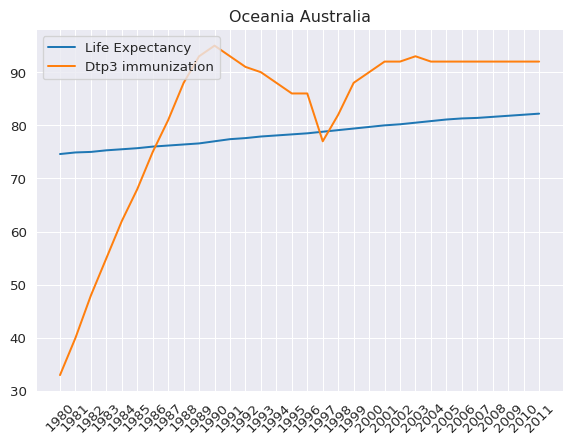

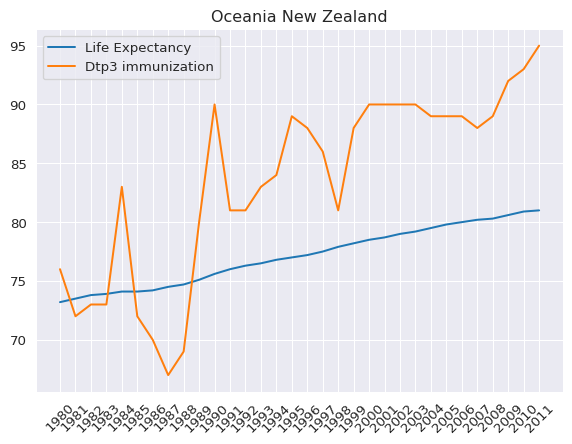

In [146]:
baseStats(expAndImmune)

# Saving to file

A easy as it is to load data from different sources it is as easy to save them back to a file. 


In [0]:
expAndImmune.to_csv('expAndImmune.csv')

# Predicting data

Like with other data science language we can performe predictive algorithms in python as well.
We will use *predictive modelling* to find out the vallues for the next year in the data.   
One of the most common methods of predictive mdelling is *regression modeling*.   
One of the most common mothods of regression modelling is *linear regression*.

# References
- [Gapminder Data - Expectancy](http://gapm.io/ilex)
- [Gapminder Data - Immunization](https://data.unicef.org/child-health/immunization.html)
- [Gapminder data animation tutorial](https://python-graph-gallery.com/341-python-gapminder-animation/)
- 
